Я тут очень много перепробывал. Было много всего ,поэтому часть удалил и все расположенно как попало.

Кстати под window в anaconda не работает VotingClassifier. Он зависает на cross_val_score. 

Старнно что тут нет графиков. TODO: Порисовать графики.

## Среднее: 0.75327710 

## Лучший результат


In [83]:
test_model(LogisticRegression(random_state=42, C=0.006, penalty='l2'),pre_data_for_lr_V3(features), y)

LogisticRegression(C=0.006, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[0.75096914 0.7548152  0.75019639 0.75713851 0.75326627]
Среднее: 0.75327710 
Стандартное отклонение: 0.00506706 
Time elapsed: 0:00:30.748996


In [22]:
import time
import datetime
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import scale
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [23]:
features = pd.read_csv('./features.csv', index_col='match_id')

features.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16.0,2449,0,4,1974,3,63


In [24]:
features_test = pd.read_csv('./features_test.csv', index_col='match_id')

features_test.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
6,1430287923,0,93,4,1103,1089,8,0,1,9,...,0,12.0,247.0,-86.0,272.0,3,4,2,0,118.0
7,1430293357,1,20,2,556,570,1,0,0,9,...,2,-29.0,168.0,-54.0,NaN,3,2,2,1,16.0
10,1430301774,1,112,2,751,808,1,0,0,13,...,1,-22.0,46.0,-87.0,186.0,1,3,3,0,-34.0
13,1430323933,1,27,3,708,903,1,1,1,11,...,2,-49.0,30.0,-89.0,210.0,3,4,2,1,-26.0
16,1430331112,1,39,4,1259,661,4,0,0,9,...,0,36.0,180.0,-86.0,180.0,1,3,2,1,-33.0


In [25]:
def test_model(model, X, y):
    k_fold = KFold(n_splits=5, random_state=42, shuffle=True) 

    start_time = datetime.datetime.now()

    print(model)

    scores = cross_val_score(model, X, y, cv=k_fold, scoring="roc_auc")
    print(scores)
    print("Среднее: %0.8f " % (scores.mean()))
    print("Стандартное отклонение: %0.8f " % (scores.std() * 2))  

    print('Time elapsed:', end=' ')
    print(datetime.datetime.now() - start_time)

In [26]:
def drop_fillna(f):
    d = f.copy()
    drop_columns = ['duration',
                    'radiant_win',
                    'tower_status_radiant',
                    'tower_status_dire',
                    'barracks_status_radiant',
                    'barracks_status_dire',
                    'lobby_type',
                    'r1_hero',
                    'r2_hero',
                    'r3_hero',
                    'r4_hero',
                    'r5_hero',
                    'd1_hero',
                    'd2_hero',
                    'd3_hero',
                    'd4_hero',
                    'd5_hero',
                    ]
    d = d.drop(columns=drop_columns)
    values = {'first_blood_time': 900, 
                'first_blood_team': -1, #Это же категориальный признакю для логистической регрессии норм?
                'first_blood_player1': -1,#Это же категориальный признакю для логистической регрессии норм?
                'first_blood_player2': -1, #Это же категориальный признакю для логистической регрессии норм?
                'radiant_bottle_time': 900,
                'radiant_courier_time': 900, 
                'radiant_flying_courier_time': 900, 
                'radiant_first_ward_time': 900, 
                'dire_bottle_time': 900,
                'dire_courier_time': 900,
                'dire_flying_courier_time': 900,
                'dire_first_ward_time': 900,} 
    d = d.fillna(value=values)
    return d

In [27]:
def pre_data(f):
    df = f.copy()
    drop_columns = ['duration',
                    'radiant_win',
                    'tower_status_radiant',
                    'tower_status_dire',
                    'barracks_status_radiant',
                    'barracks_status_dire',
                    'lobby_type',
                    'r1_hero',
                    'r2_hero',
                    'r3_hero',
                    'r4_hero',
                    'r5_hero',
                    'd1_hero',
                    'd2_hero',
                    'd3_hero',
                    'd4_hero',
                    'd5_hero',
                    ]
    X = df.drop(columns=drop_columns)
    values = {'first_blood_time': 900, 
              'first_blood_team': -1, 
              'first_blood_player1': -1,  
              'first_blood_player2': -1,
              'radiant_bottle_time': 900,
              'radiant_courier_time': 900, 
              'radiant_flying_courier_time': 900, 
              'radiant_first_ward_time': 900, 
              'dire_bottle_time': 900,
              'dire_courier_time': 900,
              'dire_flying_courier_time': 900,
              'dire_first_ward_time': 900,} 
    X = X.fillna(value=values)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X

In [28]:
def pre_data_with_hero(f):
    df = f.copy()
    drop_columns = ['duration',
                    'radiant_win',
                    'tower_status_radiant',
                    'tower_status_dire',
                    'barracks_status_radiant',
                    'barracks_status_dire',
                    'lobby_type'
                    ]
    X = df.drop(columns=drop_columns)
    values = {'first_blood_time': 900, 
              'first_blood_team': -1, 
              'first_blood_player1': -1,  
              'first_blood_player2': -1,
              'radiant_bottle_time': 900,
              'radiant_courier_time': 900, 
              'radiant_flying_courier_time': 900, 
              'radiant_first_ward_time': 900, 
              'dire_bottle_time': 900,
              'dire_courier_time': 900,
              'dire_flying_courier_time': 900,
              'dire_first_ward_time': 900,} 
    X = X.fillna(value=values)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X

In [29]:
def pre_data_for_lr(f):
    df = f.copy()
    drop_columns = ['duration',
                    'radiant_win',
                    'tower_status_radiant',
                    'tower_status_dire',
                    'barracks_status_radiant',
                    'barracks_status_dire',
                    'lobby_type',
                    'r1_hero',
                    'r2_hero',
                    'r3_hero',
                    'r4_hero',
                    'r5_hero',
                    'd1_hero',
                    'd2_hero',
                    'd3_hero',
                    'd4_hero',
                    'd5_hero',
                    ]
    X = df.drop(columns=drop_columns)
    values = {'first_blood_time': 900, 
              'first_blood_team': -1, #Это же категориальный признакю для логистической регрессии норм?
              'first_blood_player1': -1,#Это же категориальный признакю для логистической регрессии норм?
              'first_blood_player2': -1, #Это же категориальный признакю для логистической регрессии норм?
              'radiant_bottle_time': 900,
              'radiant_courier_time': 900, 
              'radiant_flying_courier_time': 900, 
              'radiant_first_ward_time': 900, 
              'dire_bottle_time': 900,
              'dire_courier_time': 900,
              'dire_flying_courier_time': 900,
              'dire_first_ward_time': 900,} 
    X = X.fillna(value=values)
    X_pick = np.zeros((features.shape[0], 112))
    for i, match_id in enumerate(features.index): #Мешок геров
        for p in range(5):
            X_pick[i, features.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
            X_pick[i, features.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1
    df_pick = pd.DataFrame(data=X_pick, index=df.index)
    #df_pick = df_pick.drop(columns=[107,106,110]) #Ненужны так как таких героев нет
    X = pd.merge(X, df_pick, left_index=True, right_index=True, how='outer')
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    return X

In [30]:
def pre_data_for_lr_V2(f):
    df = f.copy()
    drop_columns = ['duration',
                    'radiant_win',
                    'tower_status_radiant',
                    'tower_status_dire',
                    'barracks_status_radiant',
                    'barracks_status_dire',
                    'lobby_type',
                    'r1_hero',
                    'r2_hero',
                    'r3_hero',
                    'r4_hero',
                    'r5_hero',
                    'd1_hero',
                    'd2_hero',
                    'd3_hero',
                    'd4_hero',
                    'd5_hero',
                    'dire_courier_time',
                    'first_blood_player1'
                    ]
    X = df.drop(columns=drop_columns)
    values = {'first_blood_time': 900, 
              'first_blood_team': -1, 
              'first_blood_player2': -1,
              'radiant_bottle_time': 900,
              'radiant_courier_time': 900, 
              'radiant_flying_courier_time': 900, 
              'radiant_first_ward_time': 900, 
              'dire_bottle_time': 900,
              'dire_flying_courier_time': 900,
              'dire_first_ward_time': 900,} 
    X = X.fillna(value=values)
    
    X_pick = np.zeros((df.shape[0], 112))
    
    for i, match_id in enumerate(df.index): 
        for p in range(5):
            X_pick[i, df.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
            X_pick[i, df.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1
    df_pick = pd.DataFrame(data=X_pick, index=df.index)

    for p in range(5):
        X['r%d_gold_level' % (p+1)] = X['r%d_gold' % (p+1)] * X['r%d_level' % (p+1)]
        X['d%d_gold_level' % (p+1)] = -1 * X['d%d_gold' % (p+1)] * X['d%d_level' % (p+1)]

    
    X = pd.merge(X, df_pick, left_index=True, right_index=True, how='outer')
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    return X

In [31]:
def pre_data_for_lr_V3(f):
    df = f.copy()
    drop_columns = ['duration',
                    'radiant_win',
                    'tower_status_radiant',
                    'tower_status_dire',
                    'barracks_status_radiant',
                    'barracks_status_dire',
                    'lobby_type',
                    'r1_hero',
                    'r2_hero',
                    'r3_hero',
                    'r4_hero',
                    'r5_hero',
                    'd1_hero',
                    'd2_hero',
                    'd3_hero',
                    'd4_hero',
                    'd5_hero',
                    'dire_courier_time',
                    'first_blood_player1'
                    ]
    X = df.drop(columns=drop_columns)
    values = {'first_blood_time': 900, 
              'first_blood_team': -1, 
              'first_blood_player2': -1,
              'radiant_bottle_time': 900,
              'radiant_courier_time': 900, 
              'radiant_flying_courier_time': 900, 
              'radiant_first_ward_time': 900, 
              'dire_bottle_time': 900,
              'dire_flying_courier_time': 900,
          'dire_first_ward_time': 900,} 
    X = X.fillna(value=values)

    X_pick = np.zeros((df.shape[0], 112))
    
    for i, match_id in enumerate(df.index): 
        for p in range(5):
            X_pick[i, df.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
            X_pick[i, df.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1
    df_pick = pd.DataFrame(data=X_pick, index=df.index)

    X['r2_xp_r3_xp'] = X['r2_xp'] * X['r3_xp']
    X['r2_xp_r4_xp'] = X['r2_xp'] * X['r4_xp']
    X['r2_level_d1_deaths'] = X['r2_level'] * X['d1_deaths']
    X['r1_level_d3_xp'] = X['r1_level'] * X['d3_xp']

    for p in range(5):
        X['r%d_gold_level' % (p+1)] = X['r%d_gold' % (p+1)] * X['r%d_level' % (p+1)]
        X['d%d_gold_level' % (p+1)] = X['d%d_gold' % (p+1)] * X['d%d_level' % (p+1)]
        X['r%d_lh_items' % (p+1)] = X['r%d_lh' % (p+1)] * X['r%d_items' % (p+1)] 
        X['d%d_lh_items' % (p+1)] = X['d%d_lh' % (p+1)] * X['d%d_items' % (p+1)] 
        X['r%d_lh_xp' % (p+1)] = X['r%d_lh' % (p+1)] * X['r%d_xp' % (p+1)] 
        X['d%d_lh_xp' % (p+1)] = X['d%d_lh' % (p+1)] * X['d%d_xp' % (p+1)]
        X['r%d_level_r3_level' % (p+1)] = X['r%d_level' % (p+1)] * X['r3_level'] 

    X['r1_level_r1_deaths'] = X['r1_level'] * X['r1_deaths'] 
    X['r1_level_r2_deaths'] = X['r1_level'] * X['r2_deaths'] 
    X['r1_level_r3_deaths'] = X['r1_level'] * X['r3_deaths'] 
    X['r1_level_r4_deaths'] = X['r1_level'] * X['r4_deaths'] 
    X['r1_level_r5_deaths'] = X['r1_level'] * X['r5_deaths'] 

    X = pd.merge(X, df_pick, left_index=True, right_index=True, how='outer')
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
     
    return X

In [32]:
df = features
y = df['radiant_win']
X = df.drop(columns=['duration','radiant_win','tower_status_radiant','tower_status_dire','barracks_status_radiant','barracks_status_dire'])
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97230 entries, 0 to 114406
Columns: 102 entries, start_time to dire_first_ward_time
dtypes: float64(12), int64(90)
memory usage: 76.4 MB


In [12]:
X_notna = X.isna().sum()
X_notna[X_notna != 0]

first_blood_time               19553
first_blood_team               19553
first_blood_player1            19553
first_blood_player2            43987
radiant_bottle_time            15691
radiant_courier_time             692
radiant_flying_courier_time    27479
radiant_first_ward_time         1836
dire_bottle_time               16143
dire_courier_time                676
dire_flying_courier_time       26098
dire_first_ward_time            1826
dtype: int64

first_blood_time, first_blood_team и first_blood_player1 - говорит что первая кровь не всегде делается за первые 5 минут. => предположу что в таких играх будет влиять кол-во общего золота и герои.
first_blood_player2 - предположу что "второй игрок, причастный к событию" это тот кто помог всетаки. Так что нормально что числа не совпадают, так как событие может быть 1 на 1(1/3 от всех матчей).
radiant_bottle_time и dire_bottle_time - означает что либо вообще непокупают бутылку или все очень плохо у мидера. Но вообще сильно от героя зависит есть те кто может сразу и кому вообще не нужна. 
radiant_courier_time и dire_courier_time - не покупают курьера в начале => все очень плохо у саппорта и всей команды. Или саппорта нет или он дебил.
radiant_flying_courier_time и dire_flying_courier_time - не могут улучить курьера => все очень плохо у саппорта и всей команды.
radiant_first_ward_time и dire_first_ward_time - не покупают варды в начале => все очень плохо у саппорта и всей команды. НО варды еще покупают и другие обычно.

In [13]:
values = {'first_blood_time': 3000, 
          'first_blood_team': -1, 
          'first_blood_player1': -1,  
          'first_blood_player2': -1,
          'radiant_bottle_time': 3000,
          'radiant_courier_time': 3000, 
          'radiant_flying_courier_time': 3000, 
          'radiant_first_ward_time': 3000, 
          'dire_bottle_time': 3000,
          'dire_courier_time': 3000,
          'dire_flying_courier_time': 3000,
          'dire_first_ward_time': 3000,} 
#Нигде тут нельзя заменять на среднее так как нам важно что событие не произошло в превые 5 мин.
#НО вот если бы мы знали среднее после 5 мин и могли заменить на него стало бы лучше.
#Дальше я узнал что лучше число меньшее
X = X.fillna(value=values)

In [29]:
X_notna = X.isna().sum()
X_notna[X_notna != 0]

Series([], dtype: int64)

# Градиентный бустинг

In [30]:
k_fold = KFold(n_splits=5, random_state=42, shuffle=True) 

for i in range(10, 100, 10):
    test_model(model=GradientBoostingClassifier(n_estimators=i, random_state=42),X=X)

TypeError: test_model() missing 1 required positional argument: 'y'

In [10]:
start_time = datetime.datetime.now()

model = GradientBoostingClassifier(n_estimators=1000, random_state=42)

print(model)
    
scores = cross_val_score(model, X, y, cv=k_fold, scoring="roc_auc")
print(scores)
print("Среднее: %0.5f " % (scores.mean()))
print("Стандартное отклонение: %0.8f " % (scores.std() * 2))  


print('Time elapsed:', end=' ')
print(datetime.datetime.now() - start_time)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)
[0.72431535 0.72288417 0.72351451 0.72770389 0.72451518]
Среднее: 0.72459 
Стандартное отклонение: 0.00332792 
Time elapsed: 0:25:21.641317


Лучший рез
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)
[0.72431535 0.72288417 0.72351451 0.72770389 0.72451518]
Среднее: 0.72459 
Стандартное отклонение: 0.00332792 
Time elapsed: 0:25:21.641317

# Отчет

- Какие признаки имеют пропуски среди своих значений?<br>
Написано выше.
- Что могут означать пропуски в этих признаках (ответьте на этот вопрос для двух любых признаков)?<br>
Написано выше.
- Как называется столбец, содержащий целевую переменную?<br>
radiant_win
- Как долго проводилась кросс-валидация для градиентного бустинга с 30 деревьями? Инструкцию по измерению времени можно найти ниже по тексту. Какое качество при этом получилось? Напомним, что в данном задании мы используем метрику качества AUC-ROC.<br>
Среднее: 0.68977<br>
Стандартное отклонение: 0.00431423 <br>
Time elapsed: 0:00:44.575854<br>
- Имеет ли смысл использовать больше 30 деревьев в градиентном бустинге? Что бы вы предложили делать, чтобы ускорить его обучение при увеличении количества деревьев<br>
Да. Я использовал на 1000. Но стало очень медленно.<br> Среднее: 0.72459<br> Стандартное отклонение: 0.00332792<br> Time elapsed: 0:25:21.641317

# Логистическая регрессия

1) Оцените качество логистической регрессии (sklearn.linear_model.LogisticRegression с L2-регуляризацией) с помощью кросс-валидации по той же схеме, которая использовалась для градиентного бустинга. Подберите при этом лучший параметр регуляризации (C).

In [10]:
df = features

In [36]:
drop_columns = ['duration',
                'radiant_win',
                'tower_status_radiant',
                'tower_status_dire',
                'barracks_status_radiant',
                'barracks_status_dire',
               ]

y = df['radiant_win']
X = df.drop(columns=drop_columns)

values = {'first_blood_time': 3000, 
          'first_blood_team': -1, 
          'first_blood_player1': -1,  
          'first_blood_player2': -1,
          'radiant_bottle_time': 3000,
          'radiant_courier_time': 3000, 
          'radiant_flying_courier_time': 3000, 
          'radiant_first_ward_time': 3000, 
          'dire_bottle_time': 3000,
          'dire_courier_time': 3000,
          'dire_flying_courier_time': 3000,
          'dire_first_ward_time': 3000,} 
X = X.fillna(value=values)

In [37]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [38]:
for i in np.arange(0.1, 1.2, 0.2):
    test_model(model=LogisticRegression(random_state=42, C=i, penalty='l2'), X=X, y=y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[0.71386871 0.71598863 0.71561799 0.71668419 0.71763905]
Среднее: 0.71596 
Стандартное отклонение: 0.00250359 
Time elapsed: 0:00:10.287480
LogisticRegression(C=0.30000000000000004, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
[0.71386644 0.71598813 0.71561408 0.71667753 0.71763585]
Среднее: 0.71596 
Стандартное отклонение: 0.00250227 
Time elapsed: 0:00:10.241269
LogisticRegression(C=0.5000000000000001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, pe

LogisticRegression(C=0.91, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[0.71386725 0.71598743 0.71561321 0.71667409 0.71763492]
Среднее: 0.71596 
Стандартное отклонение: 0.00250052 
Time elapsed: 0:00:11.117423

2) Среди признаков в выборке есть категориальные, которые мы использовали как числовые, что вряд ли является хорошей идеей. Категориальных признаков в этой задаче одиннадцать: lobby_type и r1_hero, r2_hero, ..., r5_hero, d1_hero, d2_hero, ..., d5_hero. Уберите их из выборки, и проведите кросс-валидацию для логистической регрессии на новой выборке с подбором лучшего параметра регуляризации. 

In [39]:
df = features

In [202]:
drop_columns = ['duration',
                'radiant_win',
                'tower_status_radiant',
                'tower_status_dire',
                'barracks_status_radiant',
                'barracks_status_dire',
                'lobby_type',
                'r1_hero',
                'r2_hero',
                'r3_hero',
                'r4_hero',
                'r5_hero',
                'd1_hero',
                'd2_hero',
                'd3_hero',
                'd4_hero',
                'd5_hero',
               ]

y = df['radiant_win']
X = df.drop(columns=drop_columns)

In [203]:
values = {'first_blood_time': 3000, 
          'first_blood_team': -1, 
          'first_blood_player1': -1,  
          'first_blood_player2': -1,
          'radiant_bottle_time': 3000,
          'radiant_courier_time': 3000, 
          'radiant_flying_courier_time': 3000, 
          'radiant_first_ward_time': 3000, 
          'dire_bottle_time': 3000,
          'dire_courier_time': 3000,
          'dire_flying_courier_time': 3000,
          'dire_first_ward_time': 3000,} 
X = X.fillna(value=values)

In [204]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [205]:
for i in np.arange(0.1, 2.0, 0.1):
    start_time = datetime.datetime.now()

    model = LogisticRegression(random_state=42, C=i, penalty='l2')
    print(model)
    
    scores = cross_val_score(model, X, y, cv=k_fold, scoring="roc_auc")
    print(scores)
    print("Среднее: %0.5f " % (scores.mean()))
    print("Стандартное отклонение: %0.8f " % (scores.std() * 2))  

    print('Time elapsed:', end=' ')
    print(datetime.datetime.now() - start_time)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[0.71374904 0.71603673 0.71567785 0.7166047  0.71784607]
Среднее: 0.71598 
Стандартное отклонение: 0.00267494 
Time elapsed: 0:00:09.187590
LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[0.7137453  0.71603349 0.71567319 0.71660705 0.71784147]
Среднее: 0.71598 
Стандартное отклонение: 0.00267569 
Time elapsed: 0:00:09.401621
LogisticRegression(C=0.30000000000000004, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', ran

LogisticRegression(C=1.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[0.71374345 0.71603291 0.71567084 0.71660965 0.71783923]
Среднее: 0.71598 
Стандартное отклонение: 0.00267638 
Time elapsed: 0:00:09.405575

3) На предыдущем шаге мы исключили из выборки признаки rM_hero и dM_hero, которые показывают, какие именно герои играли за каждую команду. Это важные признаки — герои имеют разные характеристики, и некоторые из них выигрывают чаще, чем другие. Выясните из данных, сколько различных идентификаторов героев существует в данной игре (вам может пригодиться фукнция unique или value_counts).

In [41]:
df = features

In [42]:
d = df['d1_hero'].append([df['d2_hero'], df['d3_hero'], df['d4_hero'], df['d5_hero'], df['r1_hero'], df['r2_hero'], df['r3_hero'], df['r4_hero'], df['r5_hero']] , ignore_index=True)
#Вообще соединять не нужно было ,но вдруг... 
N = d.unique().size 
N

108

In [43]:
N = d.unique().max()
N

112

In [44]:
np.sort(d.unique())
#Тут пропущенный id

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 109, 110, 112], dtype=int64)

In [45]:
X_pick = np.zeros((features.shape[0], N))

for i, match_id in enumerate(features.index):
    for p in range(5):
        X_pick[i, features.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, features.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1


In [46]:
df_pick = pd.DataFrame(data=X_pick, index=df.index)
df_pick.head()

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
match_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,-1053768.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,481656.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,-256520.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,2269665.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1011576.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
drop_columns = ['duration',
                'radiant_win',
                'tower_status_radiant',
                'tower_status_dire',
                'barracks_status_radiant',
                'barracks_status_dire',
                'lobby_type',
                'r1_hero',
                'r2_hero',
                'r3_hero',
                'r4_hero',
                'r5_hero',
                'd1_hero',
                'd2_hero',
                'd3_hero',
                'd4_hero',
                'd5_hero',
               ]

y = df['radiant_win']
X = df.drop(columns=drop_columns)

values = {'first_blood_time': 300, #Оказывается если их уменьшать то становится лучше TODO:проверить какие как влияют
          'first_blood_team': -1, 
          'first_blood_player1': -1,  
          'first_blood_player2': -1,
          'radiant_bottle_time': 300,
          'radiant_courier_time': 300, 
          'radiant_flying_courier_time': 300, 
          'radiant_first_ward_time': 300, 
          'dire_bottle_time': 300,
          'dire_courier_time': 300,
          'dire_flying_courier_time': 300,
          'dire_first_ward_time': 300,} 
X = X.fillna(value=values)


In [48]:
X = pd.merge(X, df_pick, left_index=True, right_index=True, how='outer')
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97230 entries, 0 to 114406
Columns: 203 entries, start_time to 111
dtypes: float64(124), int64(79)
memory usage: 153.8 MB


In [49]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [117]:
for i in np.arange(0.1, 2.0, 0.1):
    start_time = datetime.datetime.now()

    model = LogisticRegression(random_state=42, C=i, penalty='l2')
    print(model)
    
    scores = cross_val_score(model, X, y, cv=k_fold, scoring="roc_auc")
    print(scores)
    print("Среднее: %0.5f " % (scores.mean()))
    print("Стандартное отклонение: %0.8f " % (scores.std() * 2))  

    print('Time elapsed:', end=' ')
    print(datetime.datetime.now() - start_time)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[0.74887603 0.75319956 0.74938933 0.75582093 0.75135239]
Среднее: 0.75173 
Стандартное отклонение: 0.00511169 
Time elapsed: 0:00:19.196522
LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[0.74887592 0.75319961 0.7493889  0.75581668 0.75134786]
Среднее: 0.75173 
Стандартное отклонение: 0.00510946 
Time elapsed: 0:00:19.508623
LogisticRegression(C=0.30000000000000004, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', ran

LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[0.74887592 0.75319961 0.7493889  0.75581668 0.75134786]
Среднее: 0.75173 
Стандартное отклонение: 0.00510946 
Time elapsed: 0:00:19.508623

# Попробую добавить мешок слов из геров к основному датасету

In [19]:
df = features

drop_columns = ['duration',
                'radiant_win',
                'tower_status_radiant',
                'tower_status_dire',
                'barracks_status_radiant',
                'barracks_status_dire',
                'lobby_type',
                'r1_hero',
                'r2_hero',
                'r3_hero',
                'r4_hero',
                'r5_hero',
                'd1_hero',
                'd2_hero',
                'd3_hero',
                'd4_hero',
                'd5_hero',
                ]

y = df['radiant_win']
X = df.drop(columns=drop_columns)

values = {'first_blood_time': 900, 
          'first_blood_team': -1, 
          'first_blood_player1': -1,  
          'first_blood_player2': -1,
          'radiant_bottle_time': 900,
          'radiant_courier_time': 900, 
          'radiant_flying_courier_time': 900, 
          'radiant_first_ward_time': 900, 
          'dire_bottle_time': 900,
          'dire_courier_time': 900,
          'dire_flying_courier_time': 900,
          'dire_first_ward_time': 900,} 
X = X.fillna(value=values)

In [20]:
X_pick = np.zeros((features.shape[0], 112))

for i, match_id in enumerate(features.index):
    for p in range(5):
        X_pick[i, features.loc[match_id, 'r%d_hero' % (p+1)]-1] = features.loc[match_id, 'r%d_level' % (p+1)] 
        X_pick[i, features.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1 * features.loc[match_id, 'd%d_level' % (p+1)]
    

In [21]:

df_pick = pd.DataFrame(data=X_pick, index=df.index)
#df_pick = df_pick.drop(columns=[107,106,110]) #Ненужны так как таких героев нет

X = pd.merge(X, df_pick, left_index=True, right_index=True, how='outer')

scaler = StandardScaler()   
X = scaler.fit_transform(X)
df_pick.head(10)

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
match_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
k_fold = KFold(n_splits=5, random_state=42, shuffle=True) 

start_time = datetime.datetime.now()

model = LogisticRegression(random_state=42, C=0.1, penalty='l2')
print(model)
    
scores = cross_val_score(model, X, y, cv=k_fold, scoring="roc_auc")
print(scores)
print("Среднее: %0.5f " % (scores.mean()))
print("Стандартное отклонение: %0.8f " % (scores.std() * 2))  

print('Time elapsed:', end=' ')
print(datetime.datetime.now() - start_time)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[0.7484524  0.75321642 0.74882657 0.75549802 0.75107828]
Среднее: 0.75141 
Стандартное отклонение: 0.00532966 
Time elapsed: 0:00:18.713108


С левел <br>
Среднее: 0.75141 

С голд <br>
Среднее: 0.75028 

С уровнем и голдой<br>
Среднее: 0.74959 

C уровнем и итемы<br>
Среднее: 0.74906 

С опытом и голдой<br>
Среднее: 0.74839 

C ластхитами и левел<br>
Среднее: 0.74404 


=>  Ну как тут не получается соединить чтобы лучше стало(
Так как чем ближе число в X_pick к 1 тем лучше

# Только мешок слов

In [9]:
X_pick = np.zeros((features.shape[0], 112))

for i, match_id in enumerate(features.index):
    for p in range(5):
        X_pick[i, features.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, features.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1
        
#scaler = StandardScaler()
#X = scaler.fit_transform(pd.DataFrame(data=X_pick, index=df.index))

test_model(LogisticRegression(random_state=42, C=1.0, penalty='l2'),X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[0.60373653 0.6074361  0.60408668 0.61413855 0.60944996]
Среднее: 0.60776956 
Стандартное отклонение: 0.00765913 
Time elapsed: 0:00:03.713074


Только голда<br>
Среднее: 0.74140 

Только опыт и голда<br>
Среднее: 0.74127 

Только левел и голда<br>
Среднее: 0.73921 

Только голда и предметы<br>
Среднее: 0.71600 

Только левел и итем<br>
Среднее: 0.67857 

Только голда, опыт и смерти<br>
Среднее: 0.65695 

Только голда и смерти<br>
Среднее: 0.63206 

Только смерти / убийства<br>
Среднее: 0.52548 <br>
 Очень интересно что один из основных признаков для человеков по мнению машины самый бесполезный 

Это просто датасет с мешком герове без оценки

In [37]:
test_model(LogisticRegression(random_state=42, C=0.1, penalty='l2'), pre_data_for_lr(features), y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[0.74910063 0.75340792 0.74962288 0.7560517  0.75150683]
Среднее: 0.75193799 
Стандартное отклонение: 0.00511309 
Time elapsed: 0:00:18.935748


## Среднее: 0.75193799 
## Стандартное отклонение: 0.00511309 


TODO: Надо сделать такую функцию чтобы число было наименьшем(от 0 до 1) и но сравнивало наилучшим образом
НАПРИМЕР, писать не gold ,а позицию в по золоту в этом матче.

# Отчет

- Какое качество получилось у логистической регрессии над всеми исходными признаками?Как оно соотносится с качеством градиентного бустинга? Чем вы можете объяснить эту разницу? Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом?<br>
Среднее: 0.71596<br> Стандартное отклонение: 0.00250052<br> Time elapsed: 0:00:11.117423<br> хуже чем градиентный бустинг на 1000. Но логистическая регрессия намного быстрее. 
- Как влияет на качество логистической регрессии удаление категориальных признаков (укажите новое значение метрики качества)? Чем вы можете объяснить это изменение?<br> 
Среднее: 0.75173<br> Стандартное отклонение: 0.00510946<br> Time elapsed: 0:00:19.508623<br> ну так как это линейная модель ,а категориальные призниаки не измеримы(нет метрики) ,то после удаления они перестали мешать.
- Сколько различных идентификаторов героев существует в данной игре?<br> 
108
- Какое получилось качество при добавлении "мешка слов" по героям? Улучшилось ли оно по сравнению с предыдущим вариантом? Чем вы можете это объяснить?<br> 
Только мешок героев Среднее: 0.60776956<br>
Мешок геров и прошлый данные Среднее: 0.75193799<br>
Ну мы убрали героев теперь вернули. 

# Улучшения


TODO: http://cs229.stanford.edu/proj2013/PerryConley-HowDoesHeSawMeARecommendationEngineForPickingHeroesInDota2.pdf тут про то как сделать синергию героев.

# Взвешаный мешок герое от 0 до 1

In [26]:
df = features 

df['r_gold'] = df['r1_gold'] + df['r2_gold'] + df['r3_gold'] + df['r4_gold'] + df['r5_gold']
df['d_gold'] = df['d1_gold'] + df['d2_gold'] + df['d3_gold'] + df['d4_gold'] + df['d5_gold'] 

df['gold'] = df['r_gold'] + df['d_gold']

df['r_xp'] = df['r1_xp'] + df['r2_xp'] + df['r3_xp'] + df['r4_xp'] + df['r5_xp']
df['d_xp'] = df['d1_xp'] + df['d2_xp'] + df['d3_xp'] + df['d4_xp'] + df['d5_xp'] 

df['xp'] = df['r_xp'] + df['d_xp']

df['r_level'] = df['r1_level'] + df['r2_level'] + df['r3_level'] + df['r4_level'] + df['r5_level']
df['d_level'] = df['d1_level'] + df['d2_level'] + df['d3_level'] + df['d4_level'] + df['d5_level'] 



Там есть игры в которых 0 золота каждый игрок заработал. Это как? Матчи же длинее 15 минут. Если все выйдут авто-пробеда. Все просто стояли? В проф.матче то? 

In [27]:
df = drop_fillna(df)


In [28]:
X_notna = df.isna().sum()
X_notna[X_notna != 0]

Series([], dtype: int64)

In [29]:
X_pick = np.zeros((features.shape[0], 112))
for i, match_id in enumerate(features.index): #Мешок геров
    for p in range(5):
        X_pick[i, features.loc[match_id, 'r%d_hero' % (p+1)]-1] = (features.loc[match_id, 'r%d_gold' % (p+1)] / max(features.loc[match_id, 'gold'],1) ) * (features.loc[match_id, 'r%d_xp' % (p+1)] / max(features.loc[match_id, 'xp'],1))
        X_pick[i, features.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1 * (features.loc[match_id, 'd%d_gold' % (p+1)] / max(features.loc[match_id, 'gold'],1) ) * (features.loc[match_id, 'd%d_xp' % (p+1)] / max(features.loc[match_id, 'xp'],1))


In [35]:
X = df
df_pick = pd.DataFrame(data=X_pick, index=df.index)
#df_pick = df_pick.drop(columns=[107,106,110]) #Ненужны так как таких героев нет
X = pd.merge(X, df_pick, left_index=True, right_index=True, how='outer')

scaler = StandardScaler()
X = scaler.fit_transform(X)
    

In [31]:
test_model(LogisticRegression(random_state=42, C=0.006, penalty='l2'), X, y)

LogisticRegression(C=0.006, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[0.74599367 0.75052293 0.74593432 0.7517187  0.74843158]
Среднее: 0.74852024 
Стандартное отклонение: 0.00467498 
Time elapsed: 0:00:19.293911


LogisticRegression(C=0.006, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[0.7459407  0.75085722 0.74592984 0.75240675 0.7487135 ]
Среднее: 0.74876960 
Стандартное отклонение: 0.00518900 
Time elapsed: 0:00:19.047507


Все также становится хуже. TODO:Возмножно нужна сложная формула ,а не просто перемножать.

# Новые признаки

#### Вот из json можно было вытащить и рошан и кто башни сломал и куда варды ставят и на каких линиях кто стоит...

TODO: Сделать признак частота выбора персонажа. Типо чем чаще беру тем проще контрить или имба.

## Признак частоты выбора персонажа

In [13]:
df = features
d = df['d1_hero'].append([df['d2_hero'], df['d3_hero'], df['d4_hero'], df['d5_hero'], df['r1_hero'], df['r2_hero'], df['r3_hero'], df['r4_hero'], df['r5_hero']])
df_hero = pd.DataFrame(d.value_counts(),columns=['count'])
df_hero.index.names = ['hero_id']
df_hero['count'] = df_hero['count'] / X.shape[0]
df_hero.head()

,count
hero_id,
7,0.435596
11,0.380027
112,0.369433
50,0.355878
72,0.354438


In [25]:
X = features 

for p in range(5):
    X['r%d_pick' % (p+1)]=df_hero.loc[X['r%d_hero' % (p+1)]].values
    X['d%d_pick' % (p+1)]=df_hero.loc[X['d%d_hero' % (p+1)]].values

X.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,r1_pick,d1_pick,r2_pick,d2_pick,r3_pick,d3_pick,r4_pick,d4_pick,r5_pick,d5_pick
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,0.380027,0.053142,0.074761,0.110573,0.077939,0.246632,0.096267,0.035874,0.015252,0.072138
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,0.110573,0.314841,0.045408,0.038188,0.074761,0.029939,0.035874,0.435596,0.197994,0.101831
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,0.030289,0.079111,0.034321,0.008413,0.096267,0.174473,0.057688,0.077939,0.053142,0.007889
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,0.077939,0.053595,0.230330,0.040738,0.129189,0.062306,0.035874,0.033878,0.037560,0.096267
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,0.033950,0.197994,0.057688,0.085498,0.230330,0.079111,0.354438,0.231071,0.082444,0.170565


In [26]:

X = drop_fillna(X)

X_pick = np.zeros((features.shape[0], 112))
for i, match_id in enumerate(features.index): #Мешок геров
    for p in range(5):
        X_pick[i, features.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, features.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1 

df_pick = pd.DataFrame(data=X_pick, index=df.index)
#df_pick = df_pick.drop(columns=[107,106,110]) #Ненужны так как таких героев нет
X = pd.merge(X, df_pick, left_index=True, right_index=True, how='outer')

scaler = StandardScaler()
X = scaler.fit_transform(X)
    

In [27]:
test_model(LogisticRegression(random_state=42, C=0.006, penalty='l2'), X, y)

LogisticRegression(C=0.006, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[0.74907095 0.75335809 0.74966692 0.75603883 0.75141151]
Среднее: 0.75190926 
Стандартное отклонение: 0.00509779 
Time elapsed: 0:00:17.783547


TODO: Признка винрейта

In [ ]:
X = features 

i = 7
X[X['radiant_win'] == 1 & X['r1_hero'] == i]
#(X['r1_hero'] == i or X['r2_hero'] == i or X['r3_hero'] == i or X['r4_hero'] == i or X['r5_hero'] == i or ['d1_hero'] == i or X['d2_hero'] == i or X['d3_hero'] == i or X['d4_hero'] == i or X['d5_hero'] == i)]

## Поперемножать все признаки

In [29]:
test_model(LogisticRegression(random_state=42, C=0.006, penalty='l2'), pre_data_for_lr(features), y)

LogisticRegression(C=0.006, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[0.74909211 0.75337629 0.74968956 0.7561288  0.75161866]
Среднее: 0.75198109 
Стандартное отклонение: 0.00512865 
Time elapsed: 0:00:16.033626


In [27]:
df = features.copy()
df['r1_gold_level'] = df['r1_gold'] * df['r1_level']
test_model(LogisticRegression(random_state=42, C=0.006, penalty='l2'), pre_data_for_lr(df), y)


LogisticRegression(C=0.006, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[0.74898771 0.75343698 0.74978918 0.75609404 0.75164008]
Среднее: 0.75198960 
Стандартное отклонение: 0.00513161 
Time elapsed: 0:00:16.477363


O_O Перемножение gold и level чуть чуть дало прирост на маленьком С

In [30]:
X = features.copy()

for p in range(5):
    X['r%d_gold_level' % (p+1)] = X['r%d_gold' % (p+1)] * X['r%d_level' % (p+1)]
    X['d%d_gold_level' % (p+1)] = -1 * X['d%d_gold' % (p+1)] * X['d%d_level' % (p+1)]

test_model(LogisticRegression(random_state=42, C=0.006, penalty='l2'), pre_data_for_lr(X), y)


LogisticRegression(C=0.006, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[0.7498909  0.75440483 0.75005827 0.75687977 0.75239112]
Среднее: 0.75272498 
Стандартное отклонение: 0.00531707 
Time elapsed: 0:00:19.768359


Это просто нечто. Оно улчшилось

In [34]:
X = features.copy()

for p in range(5):
    X['r%d_gold_xp' % (p+1)] = X['r%d_gold' % (p+1)] * X['r%d_xp' % (p+1)]
    X['d%d_gold_xp' % (p+1)] = -1 * X['d%d_gold' % (p+1)] * X['d%d_xp' % (p+1)]
    
test_model(LogisticRegression(random_state=42, C=0.006, penalty='l2'), pre_data_for_lr(X), y)


LogisticRegression(C=0.006, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[0.75005957 0.75433922 0.75019049 0.75677342 0.7520525 ]
Среднее: 0.75268304 
Стандартное отклонение: 0.00513553 
Time elapsed: 0:00:18.135725


Похуже 

In [36]:
X = features.copy()

X = X.drop

for p in range(5):
    X['r%d_gold_level' % (p+1)] = X['r%d_gold' % (p+1)] * X['r%d_level' % (p+1)]
    X['d%d_gold_level' % (p+1)] = -1 * X['d%d_gold' % (p+1)] * X['d%d_level' % (p+1)]
    X['r%d_level_items' % (p+1)] = X['r%d_items' % (p+1)] * X['r%d_level' % (p+1)]
    X['d%d_level_items' % (p+1)] = -1 * X['d%d_items' % (p+1)] * X['d%d_level' % (p+1)]
    X['r%d_kills_deaths' % (p+1)] = X['r%d_kills' % (p+1)] * X['r%d_deaths' % (p+1)]
    X['d%d_kills_deaths' % (p+1)] = -1 * X['d%d_kills' % (p+1)] * X['d%d_deaths' % (p+1)]
    
test_model(LogisticRegression(random_state=42, C=0.006, penalty='l2'), pre_data_for_lr(X), y)


LogisticRegression(C=0.006, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[0.74977681 0.75449093 0.74995295 0.75680562 0.75225558]
Среднее: 0.75265638 
Стандартное отклонение: 0.00539206 
Time elapsed: 0:00:21.189687


## Поперемножать все признаки

In [12]:
df = features
df = drop_fillna(df)
df = df.drop(columns=['start_time'])
col = df.columns.values
col

array(['r1_level', 'r1_xp', 'r1_gold', 'r1_lh', 'r1_kills', 'r1_deaths',
       'r1_items', 'r2_level', 'r2_xp', 'r2_gold', 'r2_lh', 'r2_kills',
       'r2_deaths', 'r2_items', 'r3_level', 'r3_xp', 'r3_gold', 'r3_lh',
       'r3_kills', 'r3_deaths', 'r3_items', 'r4_level', 'r4_xp',
       'r4_gold', 'r4_lh', 'r4_kills', 'r4_deaths', 'r4_items',
       'r5_level', 'r5_xp', 'r5_gold', 'r5_lh', 'r5_kills', 'r5_deaths',
       'r5_items', 'd1_level', 'd1_xp', 'd1_gold', 'd1_lh', 'd1_kills',
       'd1_deaths', 'd1_items', 'd2_level', 'd2_xp', 'd2_gold', 'd2_lh',
       'd2_kills', 'd2_deaths', 'd2_items', 'd3_level', 'd3_xp',
       'd3_gold', 'd3_lh', 'd3_kills', 'd3_deaths', 'd3_items',
       'd4_level', 'd4_xp', 'd4_gold', 'd4_lh', 'd4_kills', 'd4_deaths',
       'd4_items', 'd5_level', 'd5_xp', 'd5_gold', 'd5_lh', 'd5_kills',
       'd5_deaths', 'd5_items', 'first_blood_time', 'first_blood_team',
       'first_blood_player1', 'first_blood_player2',
       'radiant_bottle_time', 'radia

In [13]:
need_more_score = 0.75273538
k_fold = KFold(n_splits=5, random_state=42, shuffle=True) 
scaler = StandardScaler()
result = list()

In [14]:
df = features.copy()
drop_columns = ['duration',
                    'radiant_win',
                    'tower_status_radiant',
                    'tower_status_dire',
                    'barracks_status_radiant',
                    'barracks_status_dire',
                    'lobby_type',
                    'r1_hero',
                    'r2_hero',
                    'r3_hero',
                    'r4_hero',
                    'r5_hero',
                    'd1_hero',
                    'd2_hero',
                    'd3_hero',
                    'd4_hero',
                    'd5_hero',
                    'dire_courier_time',
                    'first_blood_player1'
                    ]
X = df.drop(columns=drop_columns)
values = {'first_blood_time': 900, 
              'first_blood_team': -1, 
              'first_blood_player2': -1,
              'radiant_bottle_time': 900,
              'radiant_courier_time': 900, 
              'radiant_flying_courier_time': 900, 
              'radiant_first_ward_time': 900, 
              'dire_bottle_time': 900,
              'dire_flying_courier_time': 900,
              'dire_first_ward_time': 900,} 
X = X.fillna(value=values)
    
X_pick = np.zeros((df.shape[0], 112))
    
for i, match_id in enumerate(df.index): 
    for p in range(5):
        X_pick[i, df.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, df.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1
        
df_pick = pd.DataFrame(data=X_pick, index=df.index)

for p in range(5):
    X['r%d_gold_level' % (p+1)] = X['r%d_gold' % (p+1)] * X['r%d_level' % (p+1)]
    X['d%d_gold_level' % (p+1)] = -1 * X['d%d_gold' % (p+1)] * X['d%d_level' % (p+1)]

    
buff_X = pd.merge(X, df_pick, left_index=True, right_index=True, how='outer')



Наверно не стоило ко pre_data_for_lr_v2 прибавлять новый признак и смотреть.

In [ ]:
start_time = datetime.datetime.now()
for i in range(1, 70):
    for j in range(i, 70):
        if i != j:
            X = buff_X.copy()
            
            X[col[i] + '_' + col[j]] = df[col[i]] * df[col[j]]
            
            X = scaler.fit_transform(X)
            
            scores = cross_val_score(LogisticRegression(random_state=42, C=0.006, penalty='l2'), X, y, cv=k_fold, scoring="roc_auc")
            
            if scores.mean() > need_more_score:
                print("------------------------------")
                print(col[i])
                print(col[j])
                #print(scores)
                print("Среднее: %0.8f " % (scores.mean()))
                print("Стандартное отклонение: %0.8f " % (scores.std() * 2))  
                result.append([col[i], col[j], scores])

                
print('Time elapsed:', end=' ')
print(datetime.datetime.now() - start_time)

------------------------------
r1_xp
r1_gold
Среднее: 0.75274184 
Стандартное отклонение: 0.00528822 
------------------------------
r1_xp
r1_lh
Среднее: 0.75274879 
Стандартное отклонение: 0.00527251 
------------------------------
r1_xp
r1_kills
Среднее: 0.75273758 
Стандартное отклонение: 0.00528706 
------------------------------
r1_xp
r2_deaths
Среднее: 0.75273875 
Стандартное отклонение: 0.00528678 
------------------------------
r1_xp
r4_level
Среднее: 0.75274369 
Стандартное отклонение: 0.00529180 
------------------------------
r1_xp
r4_xp
Среднее: 0.75274040 
Стандартное отклонение: 0.00530386 
------------------------------
r1_xp
r4_items
Среднее: 0.75274093 
Стандартное отклонение: 0.00529603 
------------------------------
r1_xp
r5_level
Среднее: 0.75275644 
Стандартное отклонение: 0.00529094 
------------------------------
r1_xp
r5_xp
Среднее: 0.75275080 
Стандартное отклонение: 0.00528586 
------------------------------
r1_xp
r5_deaths
Среднее: 0.75274798 
Стандартное от

------------------------------
r1_items
r3_items
Среднее: 0.75275251 
Стандартное отклонение: 0.00528538 
------------------------------
r1_items
r4_level
Среднее: 0.75275678 
Стандартное отклонение: 0.00528659 
------------------------------
r1_items
r4_xp
Среднее: 0.75273542 
Стандартное отклонение: 0.00526543 
------------------------------
r1_items
r4_gold
Среднее: 0.75274479 
Стандартное отклонение: 0.00525320 
------------------------------
r1_items
r4_lh
Среднее: 0.75274780 
Стандартное отклонение: 0.00527095 
------------------------------
r1_items
r4_kills
Среднее: 0.75273748 
Стандартное отклонение: 0.00526709 
------------------------------
r1_items
r4_deaths
Среднее: 0.75274316 
Стандартное отклонение: 0.00530871 
------------------------------
r1_items
r5_level
Среднее: 0.75274179 
Стандартное отклонение: 0.00529711 
------------------------------
r1_items
r5_xp
Среднее: 0.75274097 
Стандартное отклонение: 0.00530810 
------------------------------
r1_items
d1_deaths
Средн

------------------------------
r2_gold
d2_kills
Среднее: 0.75273639 
Стандартное отклонение: 0.00529395 
------------------------------
r2_gold
d3_kills
Среднее: 0.75274295 
Стандартное отклонение: 0.00528226 
------------------------------
r2_gold
d3_deaths
Среднее: 0.75273663 
Стандартное отклонение: 0.00527045 
------------------------------
r2_gold
d3_items
Среднее: 0.75275128 
Стандартное отклонение: 0.00527280 
------------------------------
r2_gold
d4_gold
Среднее: 0.75274210 
Стандартное отклонение: 0.00522837 
------------------------------
r2_gold
d4_lh
Среднее: 0.75273571 
Стандартное отклонение: 0.00526170 
------------------------------
r2_gold
d5_gold
Среднее: 0.75273817 
Стандартное отклонение: 0.00529494 
------------------------------
r2_lh
r2_kills
Среднее: 0.75275633 
Стандартное отклонение: 0.00528660 
------------------------------
r2_lh
r2_items
Среднее: 0.75279161 
Стандартное отклонение: 0.00523327 
------------------------------
r2_lh
r3_level
Среднее: 0.752743

------------------------------
r1_level
r1_xp
Среднее: 0.75274383 
Стандартное отклонение: 0.00530451 

r1_level
r1_lh
Среднее: 0.75274413 
Стандартное отклонение: 0.00529334 

r1_level
r1_deaths
Среднее: 0.75274988 
Стандартное отклонение: 0.00526568 

r1_level
r2_deaths
Среднее: 0.75274889 
Стандартное отклонение: 0.00527156 

r1_level
r2_items
Среднее: 0.75274072 
Стандартное отклонение: 0.00524638 

r1_level
r3_deaths
Среднее: 0.75273833 
Стандартное отклонение: 0.00531713 

r1_level
r4_deaths
Среднее: 0.75273688 
Стандартное отклонение: 0.00526054 

r1_level
r4_items
Среднее: 0.75273719 
Стандартное отклонение: 0.00530228 

r1_level
r5_level
Среднее: 0.75275419 
Стандартное отклонение: 0.00532937 

r1_level
r5_xp
Среднее: 0.75274567 
Стандартное отклонение: 0.00532620 

r1_level
r5_gold
Среднее: 0.75273549 
Стандартное отклонение: 0.00532020 

r1_level
r5_deaths
Среднее: 0.75275488 
Стандартное отклонение: 0.00524943 

r1_level
d1_items
Среднее: 0.75273647 
Стандартное отклонение: 0.00529903 

r1_level
d2_xp
Среднее: 0.75273783 
Стандартное отклонение: 0.00521566 

r1_level
d2_items
Среднее: 0.75273963 
Стандартное отклонение: 0.00528636 

r1_level
d3_level
Среднее: 0.75274649 
Стандартное отклонение: 0.00528158 

r1_level
d3_xp
Среднее: 0.75277242 
Стандартное отклонение: 0.00531083 

r1_level
d3_gold
Среднее: 0.75274281 
Стандартное отклонение: 0.00532727 

r1_level
d3_lh
Среднее: 0.75275481 
Стандартное отклонение: 0.00538026 

r1_level
d3_items
Среднее: 0.75274418 
Стандартное отклонение: 0.00529167 

r1_level
d4_level
Среднее: 0.75273935 
Стандартное отклонение: 0.00527054 

r1_level
d4_kills
Среднее: 0.75274357 
Стандартное отклонение: 0.00526544 

In [79]:
df = features.copy()
drop_columns = ['duration',
                    'radiant_win',
                    'tower_status_radiant',
                    'tower_status_dire',
                    'barracks_status_radiant',
                    'barracks_status_dire',
                    'lobby_type',
                    'r1_hero',
                    'r2_hero',
                    'r3_hero',
                    'r4_hero',
                    'r5_hero',
                    'd1_hero',
                    'd2_hero',
                    'd3_hero',
                    'd4_hero',
                    'd5_hero',
                    'dire_courier_time',
                    'first_blood_player1'
                    ]
X = df.drop(columns=drop_columns)
values = {'first_blood_time': 900, 
              'first_blood_team': -1, 
              'first_blood_player2': -1,
              'radiant_bottle_time': 900,
              'radiant_courier_time': 900, 
              'radiant_flying_courier_time': 900, 
              'radiant_first_ward_time': 900, 
              'dire_bottle_time': 900,
              'dire_flying_courier_time': 900,
          'dire_first_ward_time': 900,} 
X = X.fillna(value=values)


X_pick = np.zeros((df.shape[0], 112))
    
for i, match_id in enumerate(df.index): 
    for p in range(5):
        X_pick[i, df.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, df.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1
df_pick = pd.DataFrame(data=X_pick, index=df.index)

X['r2_xp_r3_xp'] = X['r2_xp'] * X['r3_xp']
X['r2_xp_r4_xp'] = X['r2_xp'] * X['r4_xp']
X['r2_level_d1_deaths'] = X['r2_level'] * X['d1_deaths']
X['r1_level_d3_xp'] = X['r1_level'] * X['d3_xp']

for p in range(5):
    X['r%d_gold_level' % (p+1)] = X['r%d_gold' % (p+1)] * X['r%d_level' % (p+1)]
    X['d%d_gold_level' % (p+1)] = X['d%d_gold' % (p+1)] * X['d%d_level' % (p+1)]
    X['r%d_lh_items' % (p+1)] = X['r%d_lh' % (p+1)] * X['r%d_items' % (p+1)] 
    X['d%d_lh_items' % (p+1)] = X['d%d_lh' % (p+1)] * X['d%d_items' % (p+1)] 
    X['r%d_lh_xp' % (p+1)] = X['r%d_lh' % (p+1)] * X['r%d_xp' % (p+1)] 
    X['d%d_lh_xp' % (p+1)] = X['d%d_lh' % (p+1)] * X['d%d_xp' % (p+1)]
    X['r%d_level_r3_level' % (p+1)] = X['r%d_level' % (p+1)] * X['r3_level'] 
    
X['r1_level_r1_deaths'] = X['r1_level'] * X['r1_deaths'] 
X['r1_level_r2_deaths'] = X['r1_level'] * X['r2_deaths'] 
X['r1_level_r3_deaths'] = X['r1_level'] * X['r3_deaths'] 
X['r1_level_r4_deaths'] = X['r1_level'] * X['r4_deaths'] 
X['r1_level_r5_deaths'] = X['r1_level'] * X['r5_deaths'] 

X = pd.merge(X, df_pick, left_index=True, right_index=True, how='outer')
scaler = StandardScaler()
X = scaler.fit_transform(X)
 
                                           
test_model(LogisticRegression(random_state=42, C=0.006, penalty='l2'), X, y)

LogisticRegression(C=0.006, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[0.75094065 0.7548132  0.75004749 0.7571516  0.75326834]
Среднее: 0.75324425 
Стандартное отклонение: 0.00515794 
Time elapsed: 0:00:26.333437


В обратном порядке. 

X['r1_level_r1_deaths'] = X['r1_level'] * X['r1_deaths'] 
X['r1_level_r2_deaths'] = X['r1_level'] * X['r2_deaths'] 
X['r1_level_r3_deaths'] = X['r1_level'] * X['r3_deaths'] 
X['r1_level_r4_deaths'] = X['r1_level'] * X['r4_deaths'] 
X['r1_level_r5_deaths'] = X['r1_level'] * X['r5_deaths'] 
     <br>
Среднее: 0.75327710 
Стандартное отклонение: 0.00506706 
Time elapsed: 0:00:26.250418

X['r2_xp_r3_xp'] = X['r2_xp'] * X['r3_xp']
X['r2_xp_r4_xp'] = X['r2_xp'] * X['r4_xp'] <br>
Среднее: 0.75320800 
Стандартное отклонение: 0.00508860 
Time elapsed: 0:00:24.830836


X['r1_level_d3_xp'] = X['r1_level'] * X['d3_xp'] <br>
Среднее: 0.75316269 
Стандартное отклонение: 0.00505031 
Time elapsed: 0:00:24.426158


X['r2_level_d1_deaths'] = X['r2_level'] * X['d1_deaths'] <br>
Среднее: 0.75312977 
Стандартное отклонение: 0.00502358 
Time elapsed: 0:00:24.228903

 X['r%d_level_r3_level' % (p+1)] = X['r%d_level' % (p+1)] * X['r3_level'] <br>
    Среднее: 0.75308998 
Стандартное отклонение: 0.00503272 
Time elapsed: 0:00:24.772423

X['r%d_gold_level' % (p+1)] = X['r%d_gold' % (p+1)] * X['r%d_level' % (p+1)]
    X['d%d_gold_level' % (p+1)] = X['d%d_gold' % (p+1)] * X['d%d_level' % (p+1)]
    X['r%d_lh_items' % (p+1)] = X['r%d_lh' % (p+1)] * X['r%d_items' % (p+1)] 
    X['d%d_lh_items' % (p+1)] = X['d%d_lh' % (p+1)] * X['d%d_items' % (p+1)] 
    X['r%d_lh_xp' % (p+1)] = X['r%d_lh' % (p+1)] * X['r%d_xp' % (p+1)] 
    X['d%d_lh_xp' % (p+1)] = X['d%d_lh' % (p+1)] * X['d%d_xp' % (p+1)] <br>
Среднее: 0.75306901 
Стандартное отклонение: 0.00502627 
Time elapsed: 0:00:22.560309

Думаю можно лучше добиться. Но это просто очень долго и не интересно...

# Лишнее столбцы?

In [43]:


test_model(LogisticRegression(random_state=42, C=0.006, penalty='l2'),pre_data_for_lr(features), y)

LogisticRegression(C=0.006, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[0.74909211 0.75337629 0.74968956 0.7561288  0.75161866]
Среднее: 0.75198109 
Стандартное отклонение: 0.00512865 
Time elapsed: 0:00:16.063951


In [11]:
test_drop_col = [
                 'first_blood_time',
                 'first_blood_player1',
                 'first_blood_player2',
                 'radiant_bottle_time',
                 'radiant_courier_time', 
                 'radiant_flying_courier_time', 
                 'radiant_first_ward_time', 
                 'dire_bottle_time',
                 'dire_courier_time',
                 'dire_flying_courier_time',
                 'dire_first_ward_time'
                ]

for c in test_drop_col:
    df = features.copy()
    drop_columns = ['duration',
                    'lobby_type',
                    'radiant_win',
                    'tower_status_radiant',
                    'tower_status_dire',
                    'barracks_status_radiant',
                    'barracks_status_dire',
                    'r1_hero',
                    'r2_hero',
                    'r3_hero',
                    'r4_hero',
                    'r5_hero',
                    'd1_hero',
                    'd2_hero',
                    'd3_hero',
                    'd4_hero',
                    'd5_hero',
                    ]
    df = df.drop(columns=drop_columns)
    values = {'first_blood_time': 900, 
                'first_blood_team': -1, 
                'first_blood_player1': -1,
                'first_blood_player2': -1,
                'radiant_bottle_time': 900,
                'radiant_courier_time': 900, 
                'radiant_flying_courier_time': 900, 
                'radiant_first_ward_time': 900, 
                'dire_bottle_time': 900,
                'dire_courier_time': 900,
                'dire_flying_courier_time': 900,
                'dire_first_ward_time': 900,} 
    df= df.fillna(value=values)

    df = df.drop(columns=[c])
    X_pick = np.zeros((features.shape[0], 112))
    for i, match_id in enumerate(features.index): #Мешок геров
        for p in range(5):
            X_pick[i, features.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
            X_pick[i, features.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1
    df_pick = pd.DataFrame(data=X_pick, index=df.index)
    #df_pick = df_pick.drop(columns=[107,106,110]) #Ненужны так как таких героев нет
    df = pd.merge(df, df_pick, left_index=True, right_index=True, how='outer')
    scaler = StandardScaler()
    df = scaler.fit_transform(df)
    
    print("DROP")
    print(c)
    test_model(LogisticRegression(random_state=42, C=0.006, penalty='l2'), df, y)

DROP
first_blood_time
LogisticRegression(C=0.006, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[0.74904369 0.75335782 0.74967924 0.75609105 0.75158811]
Среднее: 0.75195198 
Стандартное отклонение: 0.00512751 
Time elapsed: 0:00:16.390907
DROP
first_blood_player1
LogisticRegression(C=0.006, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[0.74908673 0.75337496 0.74969479 0.75612982 0.75163269]
Среднее: 0.75198380 
Стандартное отклонение: 0.00512879 
Time elapsed: 0:00:16.206955
DROP
first_blood_player2
LogisticRegression(C=0.006, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, ma

In [17]:
df = features.copy()
drop_columns = ['duration',
                    'lobby_type',
                    'radiant_win',
                    'tower_status_radiant',
                    'tower_status_dire',
                    'barracks_status_radiant',
                    'barracks_status_dire',
                    'r1_hero',
                    'r2_hero',
                    'r3_hero',
                    'r4_hero',
                    'r5_hero',
                    'd1_hero',
                    'd2_hero',
                    'd3_hero',
                    'd4_hero',
                    'd5_hero',
                'dire_courier_time',
                'first_blood_player1'
                    ]
values = {'first_blood_time': 900, 
                'first_blood_team': -1, #Это же категориальный признакю для логистической регрессии норм?
                'first_blood_player1': -1,#Это же категориальный признакю для логистической регрессии норм?
                'first_blood_player2': -1, #Это же категориальный признакю для логистической регрессии норм?
                'radiant_bottle_time': 900,
                'radiant_courier_time': 900, 
                'radiant_flying_courier_time': 900, 
                'radiant_first_ward_time': 900, 
                'dire_bottle_time': 900,
                'dire_courier_time': 900,
                'dire_flying_courier_time': 900,
                'dire_first_ward_time': 900,} 
df= df.fillna(value=values)

df = df.drop(columns=drop_columns)
X_pick = np.zeros((features.shape[0], 112))
for i, match_id in enumerate(features.index): #Мешок геров
    for p in range(5):
        X_pick[i, features.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, features.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1
df_pick = pd.DataFrame(data=X_pick, index=df.index)
#df_pick = df_pick.drop(columns=[107,106,110]) #Ненужны так как таких героев нет
df = pd.merge(df, df_pick, left_index=True, right_index=True, how='outer')
scaler = StandardScaler()
df = scaler.fit_transform(df)
    
test_model(LogisticRegression(random_state=42, C=0.006, penalty='l2'),df, y)

LogisticRegression(C=0.006, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[0.74916307 0.75335548 0.7496803  0.75614298 0.75163856]
Среднее: 0.75199608 
Стандартное отклонение: 0.00510383 
Time elapsed: 0:00:15.649782


=> Почему то признаки 'dire_courier_time' 'first_blood_player1' мешают

In [23]:
test_model(LogisticRegression(random_state=42, C=0.006, penalty='l2'),pre_data_for_lr_V2(features), y)

LogisticRegression(C=0.006, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[0.74996576 0.75438123 0.75005059 0.75688001 0.75239933]
Среднее: 0.75273538 
Стандартное отклонение: 0.00528232 
Time elapsed: 0:00:19.040429


# Другие

In [35]:
test_model(model=RandomForestClassifier(n_estimators=100, random_state=42), X=pre_data_with_hero(features), y=y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
[0.69091639 0.69343677 0.69249739 0.68971782 0.69653128]
Среднее: 0.69261993 
Стандартное отклонение: 0.00467377 
Time elapsed: 0:02:55.724006


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
test_model(KNeighborsClassifier(n_neighbors=5), pre_data_with_hero(features), y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [54]:
from sklearn.svm import SVC
test_model(model=SVC(gamma='auto',max_iter=1000), X=pre_data_with_hero(features), y=y)

/home/byzilio/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/byzilio/.local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=1000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


/home/byzilio/.local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/byzilio/.local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/byzilio/.local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/byzilio/.local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/byzilio/.l

[0.55245992 0.54537613 0.53068236 0.54072111 0.53064602]
Среднее: 0.53997711 
Стандартное отклонение: 0.01694662 
Time elapsed: 0:02:31.104315


In [56]:
from xgboost import XGBClassifier
test_model(XGBClassifier(seed=42), pre_data(features), y)

/home/byzilio/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/byzilio/.local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
       subsample=1)
[0.70506313 0.70610334 0.70477366 0.70742464 0.70900295]
Среднее: 0.70647355 
Стандартное отклонение: 0.00313922 
Time elapsed: 0:01:05.534207


In [57]:

test_model(XGBClassifier(seed=42), pre_data_for_lr_V2(features), y)

/home/byzilio/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/byzilio/.local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
       subsample=1)
[0.71255931 0.7133536  0.711067   0.71625341 0.7169643 ]
Среднее: 0.71403952 
Стандартное отклонение: 0.00446793 
Time elapsed: 0:02:13.417334


In [11]:
from sklearn.linear_model import RidgeClassifier
test_model(RidgeClassifier(), pre_data(features), y)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)
[0.71403196 0.71627487 0.71581154 0.71676522 0.7179193 ]
Среднее: 0.71616 
Стандартное отклонение: 0.00254945 
Time elapsed: 0:00:01.205618


In [13]:
test_model(RidgeClassifier(), pre_data_for_lr(features), y)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)
[0.74901289 0.75340027 0.74940324 0.75588303 0.75135882]
Среднее: 0.75181 
Стандартное отклонение: 0.00513330 
Time elapsed: 0:00:02.658397


In [ ]:
test_model(LogisticRegression(random_state=1, C=0.006, penalty='l2', solver="lbfgs",max_iter=100000), pre_data_for_lr(features), y)

# По подбираем 

In [32]:
test_model(LogisticRegression(random_state=42, C=0.1, penalty='l2', dual=True), pre_data_for_lr(features), y)

LogisticRegression(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[0.74910541 0.75340628 0.74962205 0.75605237 0.75150499]
Среднее: 0.75193822 
Стандартное отклонение: 0.00511145 
Time elapsed: 0:00:26.129695


In [33]:
test_model(LogisticRegression(random_state=42, C=0.1, penalty='l2',max_iter=10000), pre_data_for_lr(features), y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[0.74910063 0.75340792 0.74962288 0.7560517  0.75150683]
Среднее: 0.75193799 
Стандартное отклонение: 0.00511309 
Time elapsed: 0:00:19.374992


In [31]:
test_model(LogisticRegression(random_state=42, C=0.1, penalty='l2',intercept_scaling=0.5), pre_data_for_lr(features), y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=0.5, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[0.7491009  0.75340814 0.74962282 0.75605186 0.75150655]
Среднее: 0.75193805 
Стандартное отклонение: 0.00511316 
Time elapsed: 0:00:19.224988


In [34]:
test_model(LogisticRegression(random_state=42, C=0.1, penalty='l2',max_iter=10000, solver="newton-cg"), pre_data_for_lr(features), y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)
[0.74910131 0.75340835 0.74962288 0.7560516  0.7515068 ]
Среднее: 0.75193819 
Стандартное отклонение: 0.00511282 
Time elapsed: 0:00:21.393881


In [35]:
test_model(LogisticRegression(random_state=42, C=0.1, penalty='l2',max_iter=10000, solver="saga"), pre_data_for_lr(features), y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)
[0.74910072 0.75340851 0.74962293 0.75605201 0.75150675]
Среднее: 0.75193818 
Стандартное отклонение: 0.00511337 
Time elapsed: 0:00:29.481196


In [36]:
test_model(LogisticRegression(random_state=42, C=0.1, penalty='l2',max_iter=10000, solver="sag"), pre_data_for_lr(features), y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)
[0.74910118 0.75340828 0.74962245 0.75605156 0.75150682]
Среднее: 0.75193806 
Стандартное отклонение: 0.00511299 
Time elapsed: 0:00:18.346999


In [38]:
test_model(LogisticRegression(random_state=42, C=0.1, penalty='l2',max_iter=10000, solver="lbfgs"), pre_data_for_lr(features), y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)
[0.7491005  0.75341039 0.74962428 0.75605199 0.75150571]
Среднее: 0.75193857 
Стандартное отклонение: 0.00511346 
Time elapsed: 0:00:05.818927


In [39]:
test_model(LogisticRegression(random_state=42, C=0.1, penalty='l2',max_iter=10000, solver="liblinear"), pre_data_for_lr(features), y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[0.74910063 0.75340792 0.74962288 0.7560517  0.75150683]
Среднее: 0.75193799 
Стандартное отклонение: 0.00511309 
Time elapsed: 0:00:18.429014


# Результат


Попробывал все подвигать лучше не стало. Кол-во итерации не влияет.

In [47]:
test_model(LogisticRegression(random_state=42, C=0.1, penalty='l2', solver="lbfgs"), pre_data_for_lr(features), y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=99999999, multi_class='ovr',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
[0.7491005  0.75341039 0.74962428 0.75605199 0.75150571]
Среднее: 0.75193857 
Стандартное отклонение: 0.00511346 
Time elapsed: 0:00:05.823172


## Среднее: 0.75193857 
## Стандартное отклонение: 0.00511346 

# Попробуем улучшить с помощью VotingClassifier

In [28]:
X = pre_data_for_lr(features)

vc = VotingClassifier([('lr0.1', LogisticRegression(random_state=42, C=0.1, penalty='l2')),('lr1.0', LogisticRegression(random_state=42, C=1, penalty='l2'))],n_jobs=4 , voting='soft')

test_model(model=vc, X=X, y=y) 

VotingClassifier(estimators=[('lr0.1', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('lr1.0', Log...alty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=4, voting='soft', weights=None)
[0.74910011 0.75340672 0.74962076 0.75604662 0.75150218]
Среднее: 0.75193528 
Стандартное отклонение: 0.00511085 
Time elapsed: 0:00:27.003001


In [30]:
X = pre_data_for_lr_V2(features)

vc = VotingClassifier([('lr0.006', LogisticRegression(random_state=42, C=0.006, penalty='l2')),('gdb', GradientBoostingClassifier(n_estimators=50, random_state=42))],n_jobs=4 , voting='soft')

test_model(model=vc, X=X, y=y)

VotingClassifier(estimators=[('lr0.006', LogisticRegression(C=0.006, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('gdb', G...        presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False))],
         flatten_transform=None, n_jobs=4, voting='soft', weights=None)
[0.74594916 0.74867583 0.7450348  0.75126285 0.74930514]
Среднее: 0.74804556 
Стандартное отклонение: 0.00454262 
Time elapsed: 0:03:42.097883


In [12]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

class DataTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, func):
        self.func = func
    
    def fit(self, x, y=None):
        return self
    
    def transform(self, X):
        return self.func(X)

In [76]:
def wordBag(x):
    X_pick = np.zeros((features.shape[0], 113), dtype=np.float64)
    for i, match_id in enumerate(features.index):
        for p in range(5):
            X_pick[i, x.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
            X_pick[i, x.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1
    return StandardScaler().fit_transform(X_pick)

In [77]:
def wordBagItems(x):
    X_pick = np.zeros((x.shape[0], 113), dtype=np.float64)
    for i, match_id in enumerate(x.index):
        for p in range(5):
            X_pick[i, x.loc[match_id, 'r%d_hero' % (p+1)]-1] = x.loc[match_id, 'r%d_items' % (p+1)] 
            X_pick[i, x.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1 * x.loc[match_id, 'd%d_items' % (p+1)] 
    return StandardScaler().fit_transform(X_pick)

In [78]:
def wordBagKD(x):
    X_pick = np.zeros((x.shape[0], 113), dtype=np.float64)
    for i, match_id in enumerate(x.index):
        for p in range(5):
            X_pick[i, x.loc[match_id, 'r%d_hero' % (p+1)]-1] = (x.loc[match_id, 'r%d_kills' % (p+1)] + 1) / (features.loc[match_id, 'r%d_deaths' % (p+1)] + 1)
            X_pick[i, x.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1 * (x.loc[match_id, 'd%d_kills' % (p+1)] + 1) / (features.loc[match_id, 'd%d_deaths' % (p+1)] + 1)
    return StandardScaler().fit_transform(X_pick)

In [79]:
def wordBagGoldXp(x):
    X_pick = np.zeros((x.shape[0], 113), dtype=np.float64)
    for i, match_id in enumerate(x.index):
        for p in range(5):
            X_pick[i, x.loc[match_id, 'r%d_hero' % (p+1)]-1] = x.loc[match_id, 'r%d_gold' % (p+1)] * features.loc[match_id, 'r%d_xp' % (p+1)]
            X_pick[i, x.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1 * x.loc[match_id, 'd%d_gold' % (p+1)] * features.loc[match_id, 'd%d_xp' % (p+1)]
    return StandardScaler().fit_transform(X_pick)

In [80]:
def wordBagGoldLevel(x):
    X_pick = np.zeros((x.shape[0], 113), dtype=np.float64)
    for i, match_id in enumerate(x.index):
        for p in range(5):
            X_pick[i, x.loc[match_id, 'r%d_hero' % (p+1)]-1] = x.loc[match_id, 'r%d_gold' % (p+1)] * features.loc[match_id, 'r%d_level' % (p+1)]
            X_pick[i, x.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1 * x.loc[match_id, 'd%d_gold' % (p+1)] * features.loc[match_id, 'd%d_level' % (p+1)]
    return StandardScaler().fit_transform(X_pick)

In [81]:
def wordBagLh(x):
    X_pick = np.zeros((x.shape[0], 113), dtype=np.float64)
    for i, match_id in enumerate(x.index):
        for p in range(5):
            X_pick[i, x.loc[match_id, 'r%d_hero' % (p+1)]-1] = x.loc[match_id, 'r%d_lh' % (p+1)]
            X_pick[i, x.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1 * x.loc[match_id, 'd%d_lh' % (p+1)]
    return StandardScaler().fit_transform(X_pick)

In [82]:
def wordBagEx(x):
    X_pick = np.zeros((x.shape[0], 113), dtype=np.float64)
    for i, match_id in enumerate(x.index):
        for p in range(5):
            X_pick[i, x.loc[match_id, 'r%d_hero' % (p+1)]-1] = x.loc[match_id, 'r%d_ex' % (p+1)]
            X_pick[i, x.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1 * x.loc[match_id, 'd%d_ex' % (p+1)]
    return StandardScaler().fit_transform(X_pick)

In [83]:
lr_clf = Pipeline([('pre_data_for_lr_data', DataTransformer(pre_data_for_lr_V2)), ('lr1', LogisticRegression(C=0.006, random_state=42, solver='lbfgs', max_iter=100000))])
items_clf = Pipeline([('wordBagItems_data', DataTransformer(wordBagItems)), ('lr2', LogisticRegression(C=0.1, random_state=42, solver='lbfgs', max_iter=100000))])
lh_clf = Pipeline([('wordBagLh_data', DataTransformer(wordBagLh)), ('lr3', LogisticRegression(C=0.1, random_state=42, solver='lbfgs', max_iter=100000))])
gold_level_clf = Pipeline([('wordBagGoldLevel_data', DataTransformer(wordBagGoldLevel)), ('lr3', LogisticRegression(C=0.1, random_state=42, solver='lbfgs', max_iter=100000))])
gold_xp_clf = Pipeline([('wordBagGoldXp_data', DataTransformer(wordBagGoldXp)), ('lr4', LogisticRegression(C=0.1, random_state=42, solver='lbfgs', max_iter=100000))])
kills_deaths_clf = Pipeline([('wordBagKD_data', DataTransformer(wordBagKD)), ('lr5', LogisticRegression(C=0.1, random_state=42, solver='lbfgs', max_iter=100000))])
gbc_clf = Pipeline([('pre_data', DataTransformer(pre_data)), ('gbc', GradientBoostingClassifier(n_estimators=100, random_state=42))])
xp_clf = Pipeline([('wordBagXP_data', DataTransformer(pre_data)), ('gbc', GradientBoostingClassifier(n_estimators=100, random_state=42))])


In [84]:
vc = VotingClassifier([  
    ('lr_clf', lr_clf),
    #('items_clf', items_clf),
    #('lh_clf', lh_clf),
    #('gold_level_clf', gold_level_clf),
    #('gold_xp_clf', gold_xp_clf),
    #('kills_deaths_clf', kills_deaths_clf)
], voting='soft')

In [85]:
k_fold = KFold(n_splits=5, random_state=42, shuffle=True) 
start_time = datetime.datetime.now()
print(vc)
scores = cross_val_score(vc, features, y, cv=k_fold, scoring="roc_auc")
print(scores)
print("Среднее: %0.5f " % (scores.mean()))
print("Стандартное отклонение: %0.8f " % (scores.std() * 2))  
print('Time elapsed:', end=' ')
print(datetime.datetime.now() - start_time)

VotingClassifier(estimators=[('lr_clf', Pipeline(memory=None,
     steps=[('pre_data_for_lr_data', DataTransformer(func=<function pre_data_for_lr_V2 at 0x7fd050e9fe18>)), ('lr1', LogisticRegression(C=0.006, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))]))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)


/home/byzilio/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/byzilio/.local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/byzilio/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/byzilio/.local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/byzilio/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversi

[0.74994198 0.75429744 0.75003029 0.75681507 0.75234421]
Среднее: 0.75269 
Стандартное отклонение: 0.00524177 
Time elapsed: 0:00:38.441367


/home/byzilio/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/byzilio/.local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [86]:
vc = VotingClassifier([  
    #('lr_clf', lr_clf),
    ('items_clf', items_clf),
    ('lh_clf', lh_clf),
    ('gold_level_clf', gold_level_clf),
    #('gold_xp_clf', gold_xp_clf),
    #('kills_deaths_clf', kills_deaths_clf)
], voting='soft')
k_fold = KFold(n_splits=5, random_state=42, shuffle=True) 
start_time = datetime.datetime.now()
print(vc)
scores = cross_val_score(vc, features, y, cv=k_fold, scoring="roc_auc")
print(scores)
print("Среднее: %0.5f " % (scores.mean()))
print("Стандартное отклонение: %0.8f " % (scores.std() * 2))  
print('Time elapsed:', end=' ')
print(datetime.datetime.now() - start_time)

VotingClassifier(estimators=[('items_clf', Pipeline(memory=None,
     steps=[('wordBagItems_data', DataTransformer(func=<function wordBagItems at 0x7fd03da85400>)), ('lr2', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100000, multi_class='warn',...nalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))]))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)
[0.73694751 0.74122576 0.73627649 0.74484104 0.73978492]
Среднее: 0.73982 
Стандартное отклонение: 0.00619650 
Time elapsed: 0:03:15.379830


In [87]:
vc = VotingClassifier([  
    ('lr_clf', lr_clf),
    #('items_clf', items_clf),
    ('gbc_clf', items_clf),
    #('lh_clf', lh_clf),
    ('gold_level_clf', gold_level_clf),
    #('gold_xp_clf', gold_xp_clf),
    #('kills_deaths_clf', kills_deaths_clf)
], voting='soft')
test_model(vc, features, y)

VotingClassifier(estimators=[('lr_clf', Pipeline(memory=None,
     steps=[('pre_data_for_lr_data', DataTransformer(func=<function pre_data_for_lr_V2 at 0x7fd050e9fe18>)), ('lr1', LogisticRegression(C=0.006, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100000, multi_class...nalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))]))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)


/home/byzilio/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/byzilio/.local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/byzilio/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/byzilio/.local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/byzilio/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversi

[0.74386443 0.74731734 0.74425043 0.75184405 0.74711712]
Среднее: 0.74687867 
Стандартное отклонение: 0.00571997 
Time elapsed: 0:02:59.995980


In [88]:
vc = VotingClassifier([  
    ('lr_clf', lr_clf),
    #('items_clf', items_clf),
    ('gbc_clf', items_clf),
    #('lh_clf', lh_clf),
    #('gold_level_clf', gold_level_clf),
    #('gold_xp_clf', gold_xp_clf),
    #('kills_deaths_clf', kills_deaths_clf)
], voting='soft')
test_model(vc, features, y)

VotingClassifier(estimators=[('lr_clf', Pipeline(memory=None,
     steps=[('pre_data_for_lr_data', DataTransformer(func=<function pre_data_for_lr_V2 at 0x7fd050e9fe18>)), ('lr1', LogisticRegression(C=0.006, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100000, multi_class...nalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))]))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)


/home/byzilio/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/byzilio/.local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/byzilio/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/byzilio/.local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/byzilio/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversi

[0.73577629 0.73832343 0.73626395 0.74368091 0.73864667]
Среднее: 0.73853825 
Стандартное отклонение: 0.00560755 
Time elapsed: 0:01:40.453474


In [89]:
vc = VotingClassifier([  
    #('lr_clf', lr_clf),
    #('items_clf', items_clf),
    #('gbc_clf', items_clf),
    ('lh_clf', lh_clf),
    ('xp_clf', xp_clf),
    #('gold_xp_clf', gold_xp_clf),
    ('kills_deaths_clf', kills_deaths_clf)
], voting='soft')
test_model(vc, features, y)

VotingClassifier(estimators=[('lh_clf', Pipeline(memory=None,
     steps=[('wordBagLh_data', DataTransformer(func=<function wordBagLh at 0x7fd03da85ae8>)), ('lr3', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100000, multi_class='warn',
        ...nalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))]))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)


/home/byzilio/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/byzilio/.local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/byzilio/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/byzilio/.local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/byzilio/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversi

[0.73756931 0.74174199 0.73752801 0.74386109 0.74110522]
Среднее: 0.74036113 
Стандартное отклонение: 0.00494214 
Time elapsed: 0:04:40.564907


In [90]:
vc = VotingClassifier([  
    ('lr_clf', lr_clf),
    #('items_clf', items_clf),
    ('gbc_clf', items_clf),
    #('lh_clf', lh_clf),
    ('gold_level_clf', gold_level_clf),
    #('gold_xp_clf', gold_xp_clf),
    #('kills_deaths_clf', kills_deaths_clf)
], voting='soft')
test_model(vc, features, y)

VotingClassifier(estimators=[('lr_clf', Pipeline(memory=None,
     steps=[('pre_data_for_lr_data', DataTransformer(func=<function pre_data_for_lr_V2 at 0x7fd050e9fe18>)), ('lr1', LogisticRegression(C=0.006, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100000, multi_class...nalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))]))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)


/home/byzilio/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/byzilio/.local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/byzilio/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/byzilio/.local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/byzilio/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversi

[0.74386443 0.74731734 0.74425043 0.75184405 0.74711712]
Среднее: 0.74687867 
Стандартное отклонение: 0.00571997 
Time elapsed: 0:03:06.401737


## Может стоит предсказывать не победу, а кто сколько башен сломал. И потом предсказывать победу. 

In [13]:
y = features['tower_status_radiant']

In [12]:
def tower_count(v):
    result = 0
    while v > 0:
        if v % 2 == 1:
            result += 1
        v = v // 2 
    return result

In [13]:
df = features.copy()

for i in df.index:
    df.loc[i, 'tower_count_radiant'] = tower_count(df.loc[i, 'tower_status_radiant'])
df.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire,tower_count_radiant
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,2,2,-52.0,2874,1,1796,0,51,0,4.0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,3,1,-5.0,2463,1,1974,0,63,1,8.0
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,3,1,13.0,2130,0,0,1830,0,63,0.0
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,2,0,27.0,1459,0,1920,2047,50,63,4.0
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,0,-16.0,2449,0,4,1974,3,63,1.0


In [14]:
y = df['tower_count_radiant']

In [17]:
k_fold = KFold(n_splits=5, random_state=42, shuffle=True) 

start_time = datetime.datetime.now()

model = LogisticRegression(random_state=42, C=0.006, penalty='l2')

print(model)

scores = cross_val_score(model, pre_data_for_lr_V3(features), y, cv=k_fold)
print(scores)
print("Среднее: %0.8f " % (scores.mean()))
print("Стандартное отклонение: %0.8f " % (scores.std() * 2))  

print('Time elapsed:', end=' ')
print(datetime.datetime.now() - start_time)

LogisticRegression(C=0.006, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[0.23048442 0.23120436 0.2302273  0.22703898 0.22863314]
Среднее: 0.22951764 
Стандартное отклонение: 0.00299458 
Time elapsed: 0:05:50.474384


In [18]:
model = LogisticRegression(random_state=42, C=0.006, penalty='l2')
model = model.fit(pre_data_for_lr_V3(features), y)
result = model.predict(pre_data_for_lr_V3(features))


In [19]:
df = features.copy()
y = features['radiant_win']
df['towers'] = result
test_model(LogisticRegression(random_state=42, C=0.006, penalty='l2'),pre_data_for_lr_V3(df), y)

LogisticRegression(C=0.006, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[0.75099816 0.75485412 0.75014032 0.75699867 0.75330689]
Среднее: 0.75325963 
Стандартное отклонение: 0.00500954 
Time elapsed: 0:00:33.238962


In [15]:
k_fold = KFold(n_splits=5, random_state=42, shuffle=True) 

start_time = datetime.datetime.now()

model = LogisticRegression(random_state=42, C=0.006, penalty='l2')

print(model)

scores = cross_val_score(model, pre_data_for_lr_V3(features), y, cv=k_fold, scoring='neg_mean_squared_error')
print(scores)
print("Среднее: %0.8f " % (scores.mean()))
print("Стандартное отклонение: %0.8f " % (scores.std() * 2))  

print("Доля ошибок: {:.8%}".format((scores.mean()*features.shape[0]) / np.sum(y)))

print('Time elapsed:', end=' ')
print(datetime.datetime.now() - start_time)

LogisticRegression(C=0.006, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[-24.38542631 -24.09004423 -24.84942919 -24.54581919 -24.36804484]
Среднее: -24.44775275 
Стандартное отклонение: 0.49731625 
Доля ошибок: -489.37179867%
Time elapsed: 0:06:06.277790


In [16]:
k_fold = KFold(n_splits=5, random_state=42, shuffle=True) 

start_time = datetime.datetime.now()

model = RandomForestClassifier(n_estimators=50, random_state=42)

print(model)

scores = cross_val_score(model, pre_data_for_lr_V3(features), y, cv=k_fold, scoring='neg_mean_squared_error')
print(scores)
print("Среднее: %0.8f " % (scores.mean()))
print("Стандартное отклонение: %0.8f " % (scores.std() * 2))  

print("Доля ошибок: {:.8%}".format((scores.mean()*features.shape[0]) / np.sum(y)))

print('Time elapsed:', end=' ')
print(datetime.datetime.now() - start_time)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
[-27.05348144 -27.16769516 -27.11138537 -27.0090507  -26.81374062]
Среднее: -27.03107066 
Стандартное отклонение: 0.24221672 
Доля ошибок: -541.08219280%
Time elapsed: 0:02:37.627888


### Голосовалка с разными признаками LogisticRegression
ИДЕЯ: Каждый новое перемножение признков дает по чуть-чуть прирост и запихать в один датасет нельзя, они друг другу мешают. 

In [11]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

class DataTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, func):
        self.func = func
    
    def fit(self, x, y=None):
        return self
    
    def transform(self, X):
        return self.func(X)

In [22]:
lr_clf = Pipeline([('pre_data_for_lr_data', DataTransformer(pre_data_for_lr_V2)), ('lr1', LogisticRegression(C=0.006, random_state=42))])


In [23]:
vc = VotingClassifier([  
    ('lr_clf', lr_clf),
    #('items_clf', items_clf),
    #('lh_clf', lh_clf),
    #('gold_level_clf', gold_level_clf),
    #('gold_xp_clf', gold_xp_clf),
    #('kills_deaths_clf', kills_deaths_clf)
], voting='soft')

In [24]:
k_fold = KFold(n_splits=5, random_state=42, shuffle=True) 
start_time = datetime.datetime.now()
print(vc)
scores = cross_val_score(vc, features, y, cv=k_fold, scoring="roc_auc")
print(scores)
print("Среднее: %0.8f " % (scores.mean()))
print("Стандартное отклонение: %0.8f " % (scores.std() * 2))  
print('Time elapsed:', end=' ')
print(datetime.datetime.now() - start_time)

VotingClassifier(estimators=[('lr_clf', Pipeline(memory=None,
     steps=[('pre_data_for_lr_data', DataTransformer(func=<function pre_data_for_lr_V2 at 0x000001AEE49FD378>)), ('lr1', LogisticRegression(C=0.006, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)
[0.74994159 0.75429851 0.75003273 0.75681347 0.75234453]
Среднее: 0.75268616 
Стандартное отклонение: 0.00524019 
Time elapsed: 0:00:59.441088


Проверка. Возмем самые полезные признаки.

In [12]:
def test1(f):
    X = f.copy()
    X['r2_lh_r2_items'] = X['r2_lh'] * X['r2_items']
    return pre_data_for_lr_V2(X)
def test2(f):
    X = f.copy()
    X['r2_xp_r3_xp'] = X['r2_xp'] * X['r3_xp']
    return pre_data_for_lr_V2(X)
def test3(f):
    X = f.copy()
    X['r2_xp_r4_xp'] = X['r2_xp'] * X['r4_xp']
    return pre_data_for_lr_V2(X)
def test4(f):
    X = f.copy()
    X['r2_level_d1_deaths'] = X['r2_level'] * X['d1_deaths']
    return pre_data_for_lr_V2(X)
def test5(f):
    X = f.copy()
    X['r1_level_d3_xp'] = X['r1_level'] * X['d3_xp']
    return pre_data_for_lr_V2(X)
def test6(f):
    X = f.copy()
    for p in range(5):
        X['r%d_lh_items' % (p+1)] = X['r%d_lh' % (p+1)] * X['r%d_items' % (p+1)] 
        X['d%d_lh_items' % (p+1)] = X['d%d_lh' % (p+1)] * X['d%d_items' % (p+1)] 
        X['r%d_lh_xp' % (p+1)] = X['r%d_lh' % (p+1)] * X['r%d_xp' % (p+1)] 
        X['d%d_lh_xp' % (p+1)] = X['d%d_lh' % (p+1)] * X['d%d_xp' % (p+1)]
        X['r%d_level_r3_level' % (p+1)] = X['r%d_level' % (p+1)] * X['r3_level'] 
    return pre_data_for_lr_V2(X)
def test7(f):
    X = f.copy()
    X['r1_level_r1_deaths'] = X['r1_level'] * X['r1_deaths'] 
    X['r1_level_r2_deaths'] = X['r1_level'] * X['r2_deaths'] 
    X['r1_level_r3_deaths'] = X['r1_level'] * X['r3_deaths'] 
    X['r1_level_r4_deaths'] = X['r1_level'] * X['r4_deaths'] 
    X['r1_level_r5_deaths'] = X['r1_level'] * X['r5_deaths'] 
    return pre_data_for_lr_V2(X)

In [13]:
t1 = Pipeline([('test1', DataTransformer(test1)), ('lr1', LogisticRegression(C=0.006, random_state=42))])
t2 = Pipeline([('test2', DataTransformer(test2)), ('lr1', LogisticRegression(C=0.006, random_state=42))])
t3 = Pipeline([('test3', DataTransformer(test3)), ('lr1', LogisticRegression(C=0.006, random_state=42))])
t4 = Pipeline([('test4', DataTransformer(test4)), ('lr1', LogisticRegression(C=0.006, random_state=42))])
t5 = Pipeline([('test5', DataTransformer(test5)), ('lr1', LogisticRegression(C=0.006, random_state=42))])
t6 = Pipeline([('test6', DataTransformer(test6)), ('lr1', LogisticRegression(C=0.006, random_state=42))])
t7 = Pipeline([('test7', DataTransformer(test7)), ('lr1', LogisticRegression(C=0.006, random_state=42))])

In [14]:
vc = VotingClassifier([  
    ('t1', t1),  
    ('t2', t2),  
    ('t3', t3),  
    ('t4', t4),  
    ('t5', t5),  
    ('t6', t6),  
    ('t7', t7),
], voting='soft')

In [31]:
k_fold = KFold(n_splits=5, random_state=42, shuffle=True) 
start_time = datetime.datetime.now()
print(vc)
scores = cross_val_score(vc, features, y, cv=k_fold, scoring="roc_auc")
print(scores)
print("Среднее: %0.8f " % (scores.mean()))
print("Стандартное отклонение: %0.8f " % (scores.std() * 2))  
print('Time elapsed:', end=' ')
print(datetime.datetime.now() - start_time)

VotingClassifier(estimators=[('t1', Pipeline(memory=None,
     steps=[('test1', DataTransformer(func=<function test1 at 0x000001C89C676EA0>)), ('lr1', LogisticRegression(C=0.006, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          pen...y='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)
[0.75019857 0.75446854 0.75016746 0.75695669 0.75256465]
Среднее: 0.75287118 
Стандартное отклонение: 0.00519922 
Time elapsed: 0:06:46.202604


без t7<br>
Среднее: 0.75287698 
Стандартное отклонение: 0.00519796 
Time elapsed: 0:06:10.058025

Ну совсем маленький прирост. Но он хотябы появился. Только некоторые признаки хуже делают. Надо думоть. 

## BaggingClassifier & LogisticRegression

In [13]:
test_model(BaggingClassifier(LogisticRegression(C=0.006, random_state=42), n_estimators=10, random_state=42),pre_data_for_lr_V3(features), y) 

BaggingClassifier(base_estimator=LogisticRegression(C=0.006, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)
[0.7509102  0.75463497 0.7500564  0.75689812 0.75330545]
Среднее: 0.75316103 
Стандартное отклонение: 0.00496904 
Time elapsed: 0:04:25.395269


In [ ]:
test_model(BaggingClassifier(LogisticRegression(C=0.006, random_state=42), n_estimators=50, random_state=42), pre_data_for_lr_V3(features), y) 

BaggingClassifier(base_estimator=LogisticRegression(C=0.006, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=50, n_jobs=1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)


In [13]:
test_model(BaggingClassifier(LogisticRegression(C=0.006, random_state=42), n_estimators=100, random_state=42),pre_data_for_lr_V3(features), y) 

BaggingClassifier(base_estimator=LogisticRegression(C=0.006, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)
[0.75095142 0.75484166 0.75011038 0.75710017 0.75333213]
Среднее: 0.75326715 
Стандартное отклонение: 0.00509927 
Time elapsed: 0:43:22.060628


In [13]:
test_model(BaggingClassifier(LogisticRegression(C=0.006, random_state=42), n_estimators=50, max_features=0.5, random_state=42), pre_data_for_lr_V3(features), y) 

BaggingClassifier(base_estimator=LogisticRegression(C=0.006, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=1.0, n_estimators=50, n_jobs=1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)
[0.74419462 0.74608938 0.74295959 0.7478555  0.74712732]
Среднее: 0.74564528 
Стандартное отклонение: 0.00364374 
Time elapsed: 0:11:10.112860


### http://cs229.stanford.edu/proj2013/PerryConley-HowDoesHeSawMeARecommendationEngineForPickingHeroesInDota2.pdf 

In [33]:
def distance(v1, v2):
    return np.sum(np.logical_and(v1, v2))

def poly_param(d):
    def poly_weights(distances):
        '''Returns a list of weights given a polynomial weighting function'''
        weights = np.power(np.multiply(distances[0], 0.1), d)
        return np.array([weights])
    return poly_weights

In [34]:
NUM_MATCHES = features.shape[0]

X = np.zeros((features.shape[0], 112 * 2), dtype=np.int8)

y = features['radiant_win']

for i, match_id in enumerate(features.index): 
    for p in range(5):
        X[i, features.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X[i, 112 + features.loc[match_id, 'd%d_hero' % (p+1)]-1] = 1

print(X)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


In [35]:
        
d = 4
K = 2
model = KNeighborsClassifier(n_neighbors=NUM_MATCHES/K, metric=distance, weights=poly_param(d))

In [ ]:
test_model(model, X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30,
           metric=<function distance at 0x0000015761381598>,
           metric_params=None, n_jobs=1, n_neighbors=48615.0, p=2,
           weights=<function poly_param.<locals>.poly_weights at 0x0000015762724E18>)


## Немного бессмысленных heatmap'ов

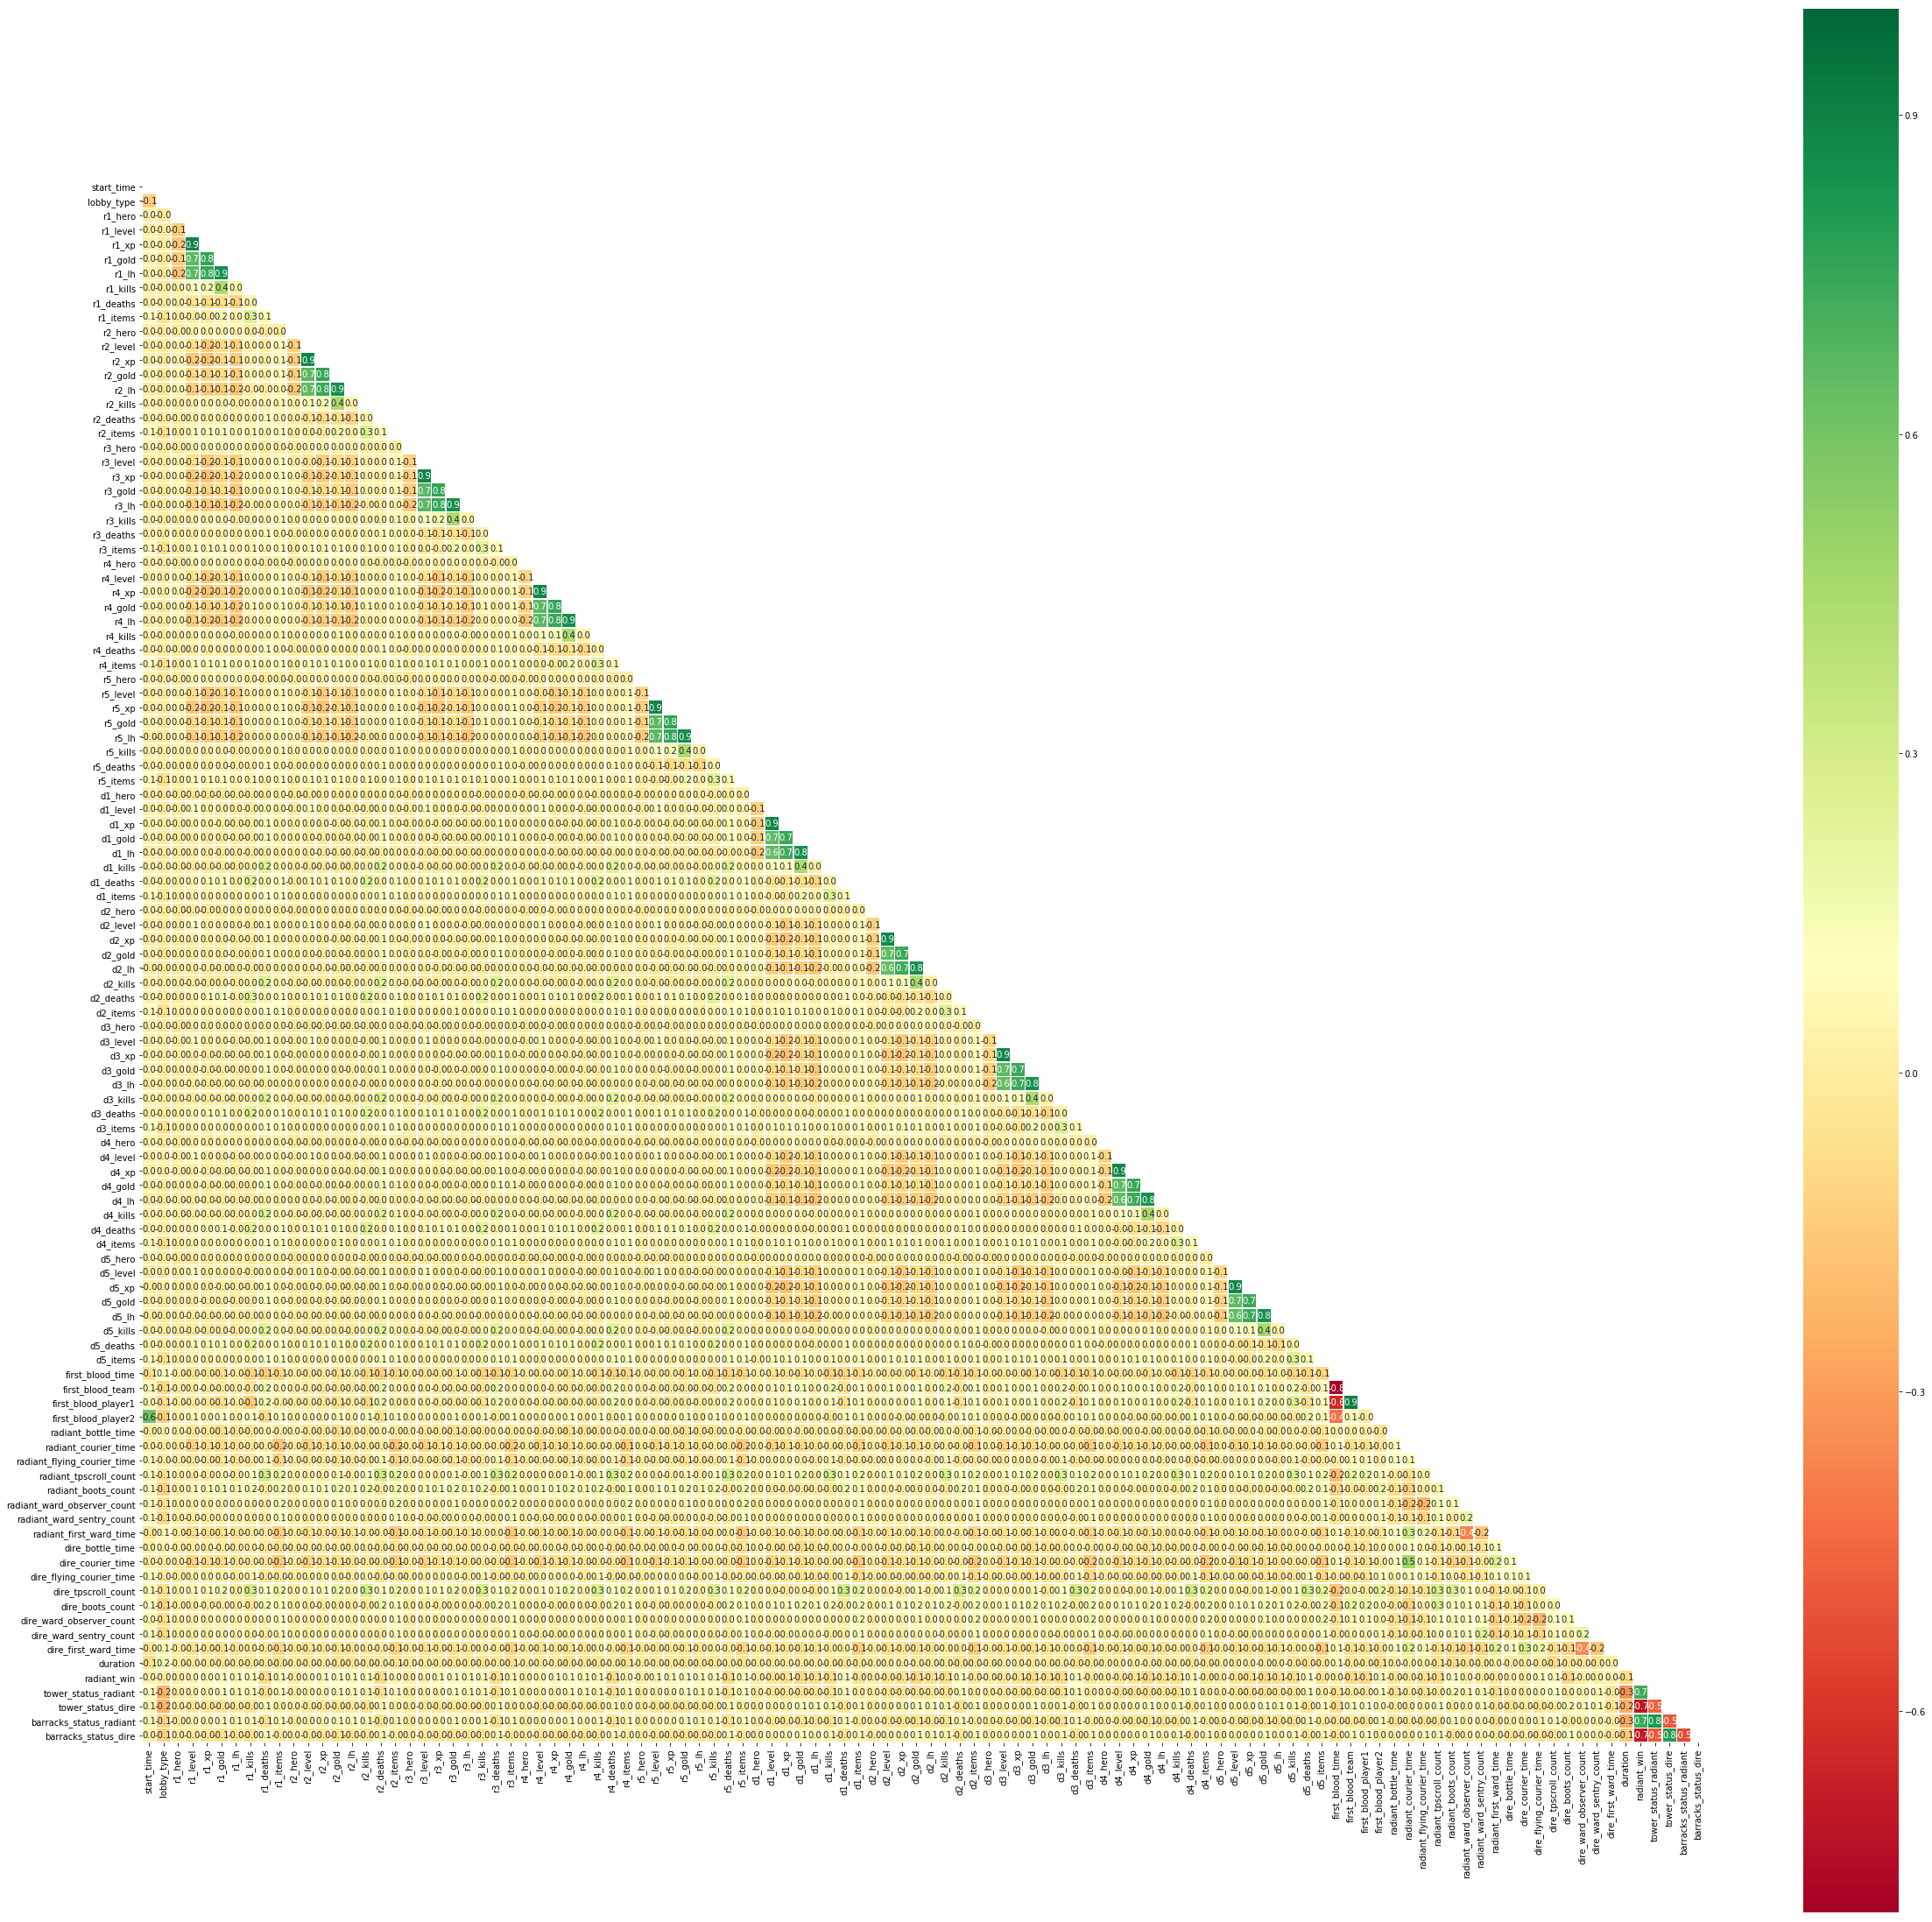

In [19]:
from pylab import savefig
fig, ax = plt.subplots(figsize=(40,40))

df = pd.read_csv('./features.csv', index_col='match_id')

'''
 drop_columns = ['duration',
                    'radiant_win',
                    'tower_status_radiant',
                    'tower_status_dire',
                    'barracks_status_radiant',
                    'barracks_status_dire',
                    'lobby_type',
                    'r1_hero',
                    'r2_hero',
                    'r3_hero',
                    'r4_hero',
                    'r5_hero',
                    'd1_hero',
                    'd2_hero',
                    'd3_hero',
                    'd4_hero',
                    'd5_hero',
                    ]
df = df.drop(columns=drop_columns)
                    '''
values = {'first_blood_time': 900, 
                'first_blood_team': -1, #Это же категориальный признакю для логистической регрессии норм?
                'first_blood_player1': -1,#Это же категориальный признакю для логистической регрессии норм?
                'first_blood_player2': -1, #Это же категориальный признакю для логистической регрессии норм?
                'radiant_bottle_time': 900,
                'radiant_courier_time': 900, 
                'radiant_flying_courier_time': 900, 
                'radiant_first_ward_time': 900, 
                'dire_bottle_time': 900,
                'dire_courier_time': 900,
                'dire_flying_courier_time': 900,
                'dire_first_ward_time': 900,} 
 
df = df.fillna(value=values)
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(corr, cmap="RdYlGn", square=True, linewidths=.5, mask=mask,annot=True, fmt=".1f",ax=ax)

figure = svm.get_figure()    
figure.savefig('heatmap.png', dpi=400) #Рассматирвайте png там все видно.

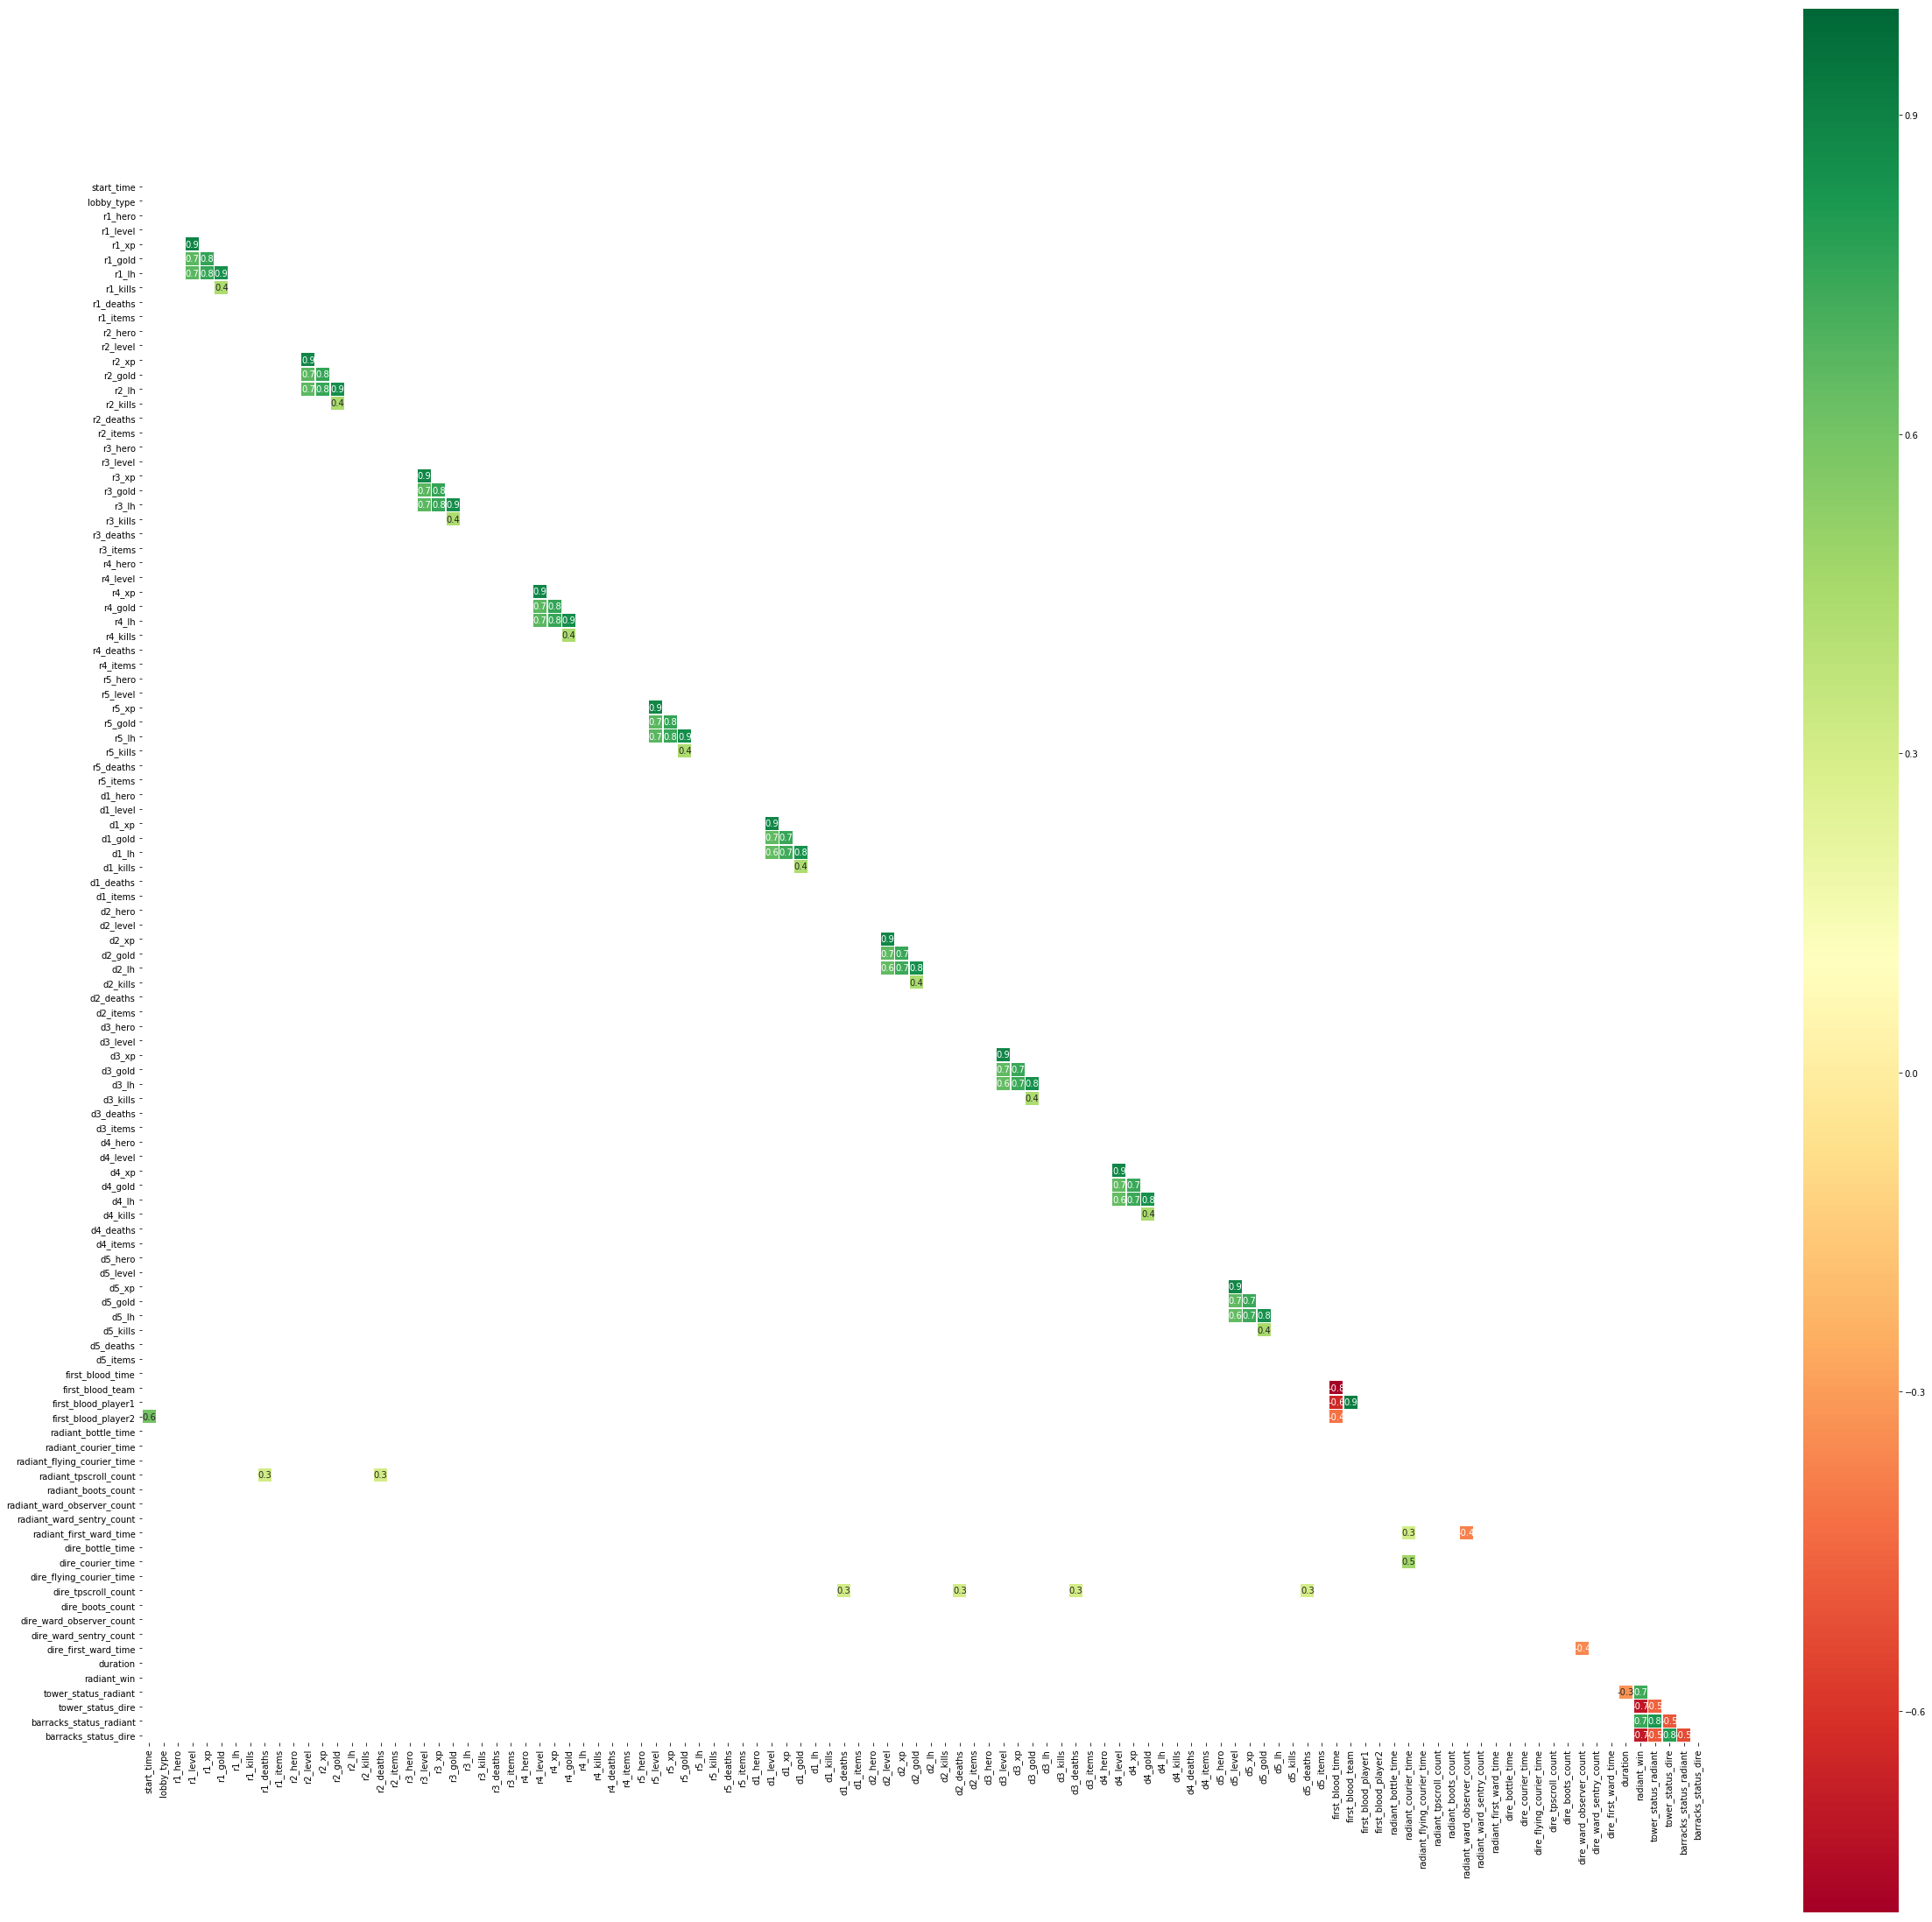

In [26]:
fig, ax = plt.subplots(figsize=(40,40))

df = pd.read_csv('./features.csv', index_col='match_id')

values = {'first_blood_time': 900, 
                'first_blood_team': -1, #Это же категориальный признакю для логистической регрессии норм?
                'first_blood_player1': -1,#Это же категориальный признакю для логистической регрессии норм?
                'first_blood_player2': -1, #Это же категориальный признакю для логистической регрессии норм?
                'radiant_bottle_time': 900,
                'radiant_courier_time': 900, 
                'radiant_flying_courier_time': 900, 
                'radiant_first_ward_time': 900, 
                'dire_bottle_time': 900,
                'dire_courier_time': 900,
                'dire_flying_courier_time': 900,
                'dire_first_ward_time': 900,} 
 
df = df.fillna(value=values)

corr = df.corr()

corr = corr[np.abs(corr) >= 0.3]

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(corr, cmap="RdYlGn", square=True, linewidths=.5, mask=mask,annot=True, fmt=".1f",ax=ax)

figure = svm.get_figure()    
figure.savefig('heatmap_0_3.png', dpi=400)

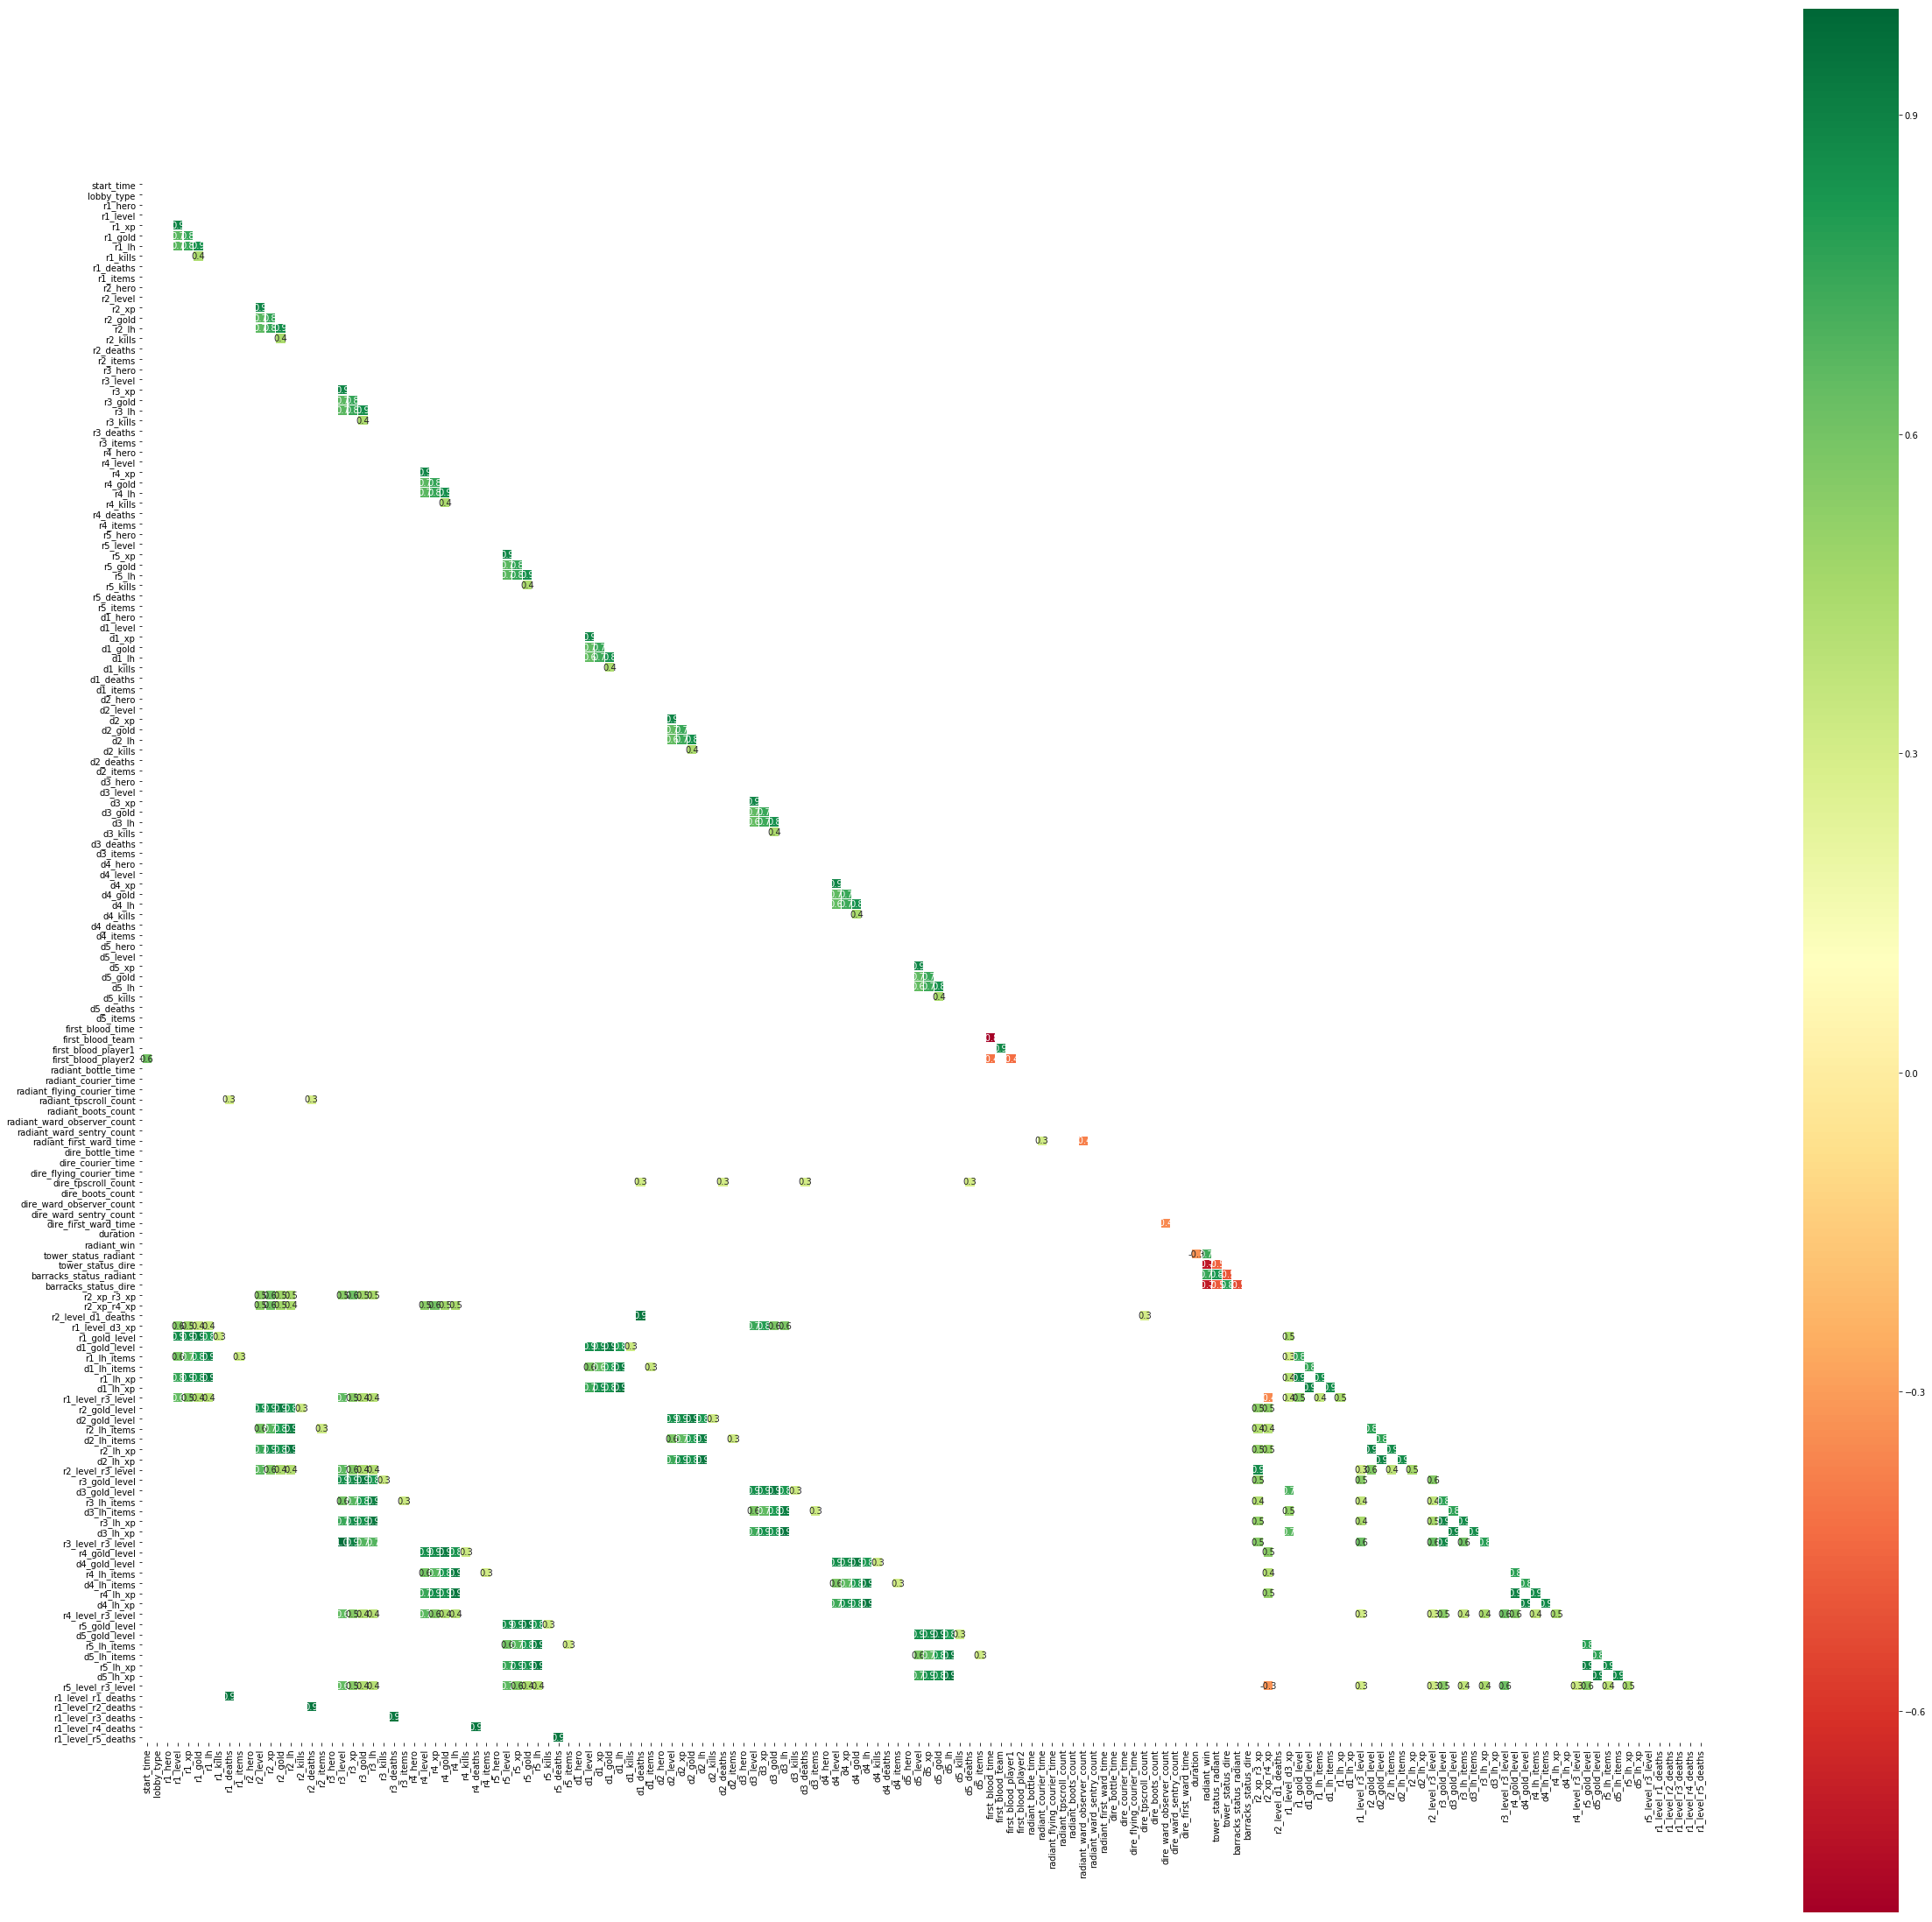

In [29]:
fig, ax = plt.subplots(figsize=(40,40))

X = pd.read_csv('./features.csv', index_col='match_id')

drop_columns = ['duration',
                    'radiant_win',
                    'tower_status_radiant',
                    'tower_status_dire',
                    'barracks_status_radiant',
                    'barracks_status_dire',
                    'lobby_type',
                    'r1_hero',
                    'r2_hero',
                    'r3_hero',
                    'r4_hero',
                    'r5_hero',
                    'd1_hero',
                    'd2_hero',
                    'd3_hero',
                    'd4_hero',
                    'd5_hero',
                    'dire_courier_time',
                    'first_blood_player1'
                    ]
#X = df.drop(columns=drop_columns)
values = {'first_blood_time': 900, 
              'first_blood_team': -1, 
              'first_blood_player2': -1,
              'radiant_bottle_time': 900,
              'radiant_courier_time': 900, 
              'radiant_flying_courier_time': 900, 
              'radiant_first_ward_time': 900, 
              'dire_bottle_time': 900,
              'dire_flying_courier_time': 900,
          'dire_first_ward_time': 900,} 
X = X.fillna(value=values)


X['r2_xp_r3_xp'] = X['r2_xp'] * X['r3_xp']
X['r2_xp_r4_xp'] = X['r2_xp'] * X['r4_xp']
X['r2_level_d1_deaths'] = X['r2_level'] * X['d1_deaths']
X['r1_level_d3_xp'] = X['r1_level'] * X['d3_xp']

for p in range(5):
    X['r%d_gold_level' % (p+1)] = X['r%d_gold' % (p+1)] * X['r%d_level' % (p+1)]
    X['d%d_gold_level' % (p+1)] = X['d%d_gold' % (p+1)] * X['d%d_level' % (p+1)]
    X['r%d_lh_items' % (p+1)] = X['r%d_lh' % (p+1)] * X['r%d_items' % (p+1)] 
    X['d%d_lh_items' % (p+1)] = X['d%d_lh' % (p+1)] * X['d%d_items' % (p+1)] 
    X['r%d_lh_xp' % (p+1)] = X['r%d_lh' % (p+1)] * X['r%d_xp' % (p+1)] 
    X['d%d_lh_xp' % (p+1)] = X['d%d_lh' % (p+1)] * X['d%d_xp' % (p+1)]
    X['r%d_level_r3_level' % (p+1)] = X['r%d_level' % (p+1)] * X['r3_level'] 

X['r1_level_r1_deaths'] = X['r1_level'] * X['r1_deaths'] 
X['r1_level_r2_deaths'] = X['r1_level'] * X['r2_deaths'] 
X['r1_level_r3_deaths'] = X['r1_level'] * X['r3_deaths'] 
X['r1_level_r4_deaths'] = X['r1_level'] * X['r4_deaths'] 
X['r1_level_r5_deaths'] = X['r1_level'] * X['r5_deaths'] 


corr = X.corr()

corr = corr[np.abs(corr) >= 0.3]

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(corr, cmap="RdYlGn", square=True, linewidths=.5, mask=mask,annot=True, fmt=".1f",ax=ax)

figure = svm.get_figure()    
figure.savefig('heatmap_0_3.png', dpi=400)

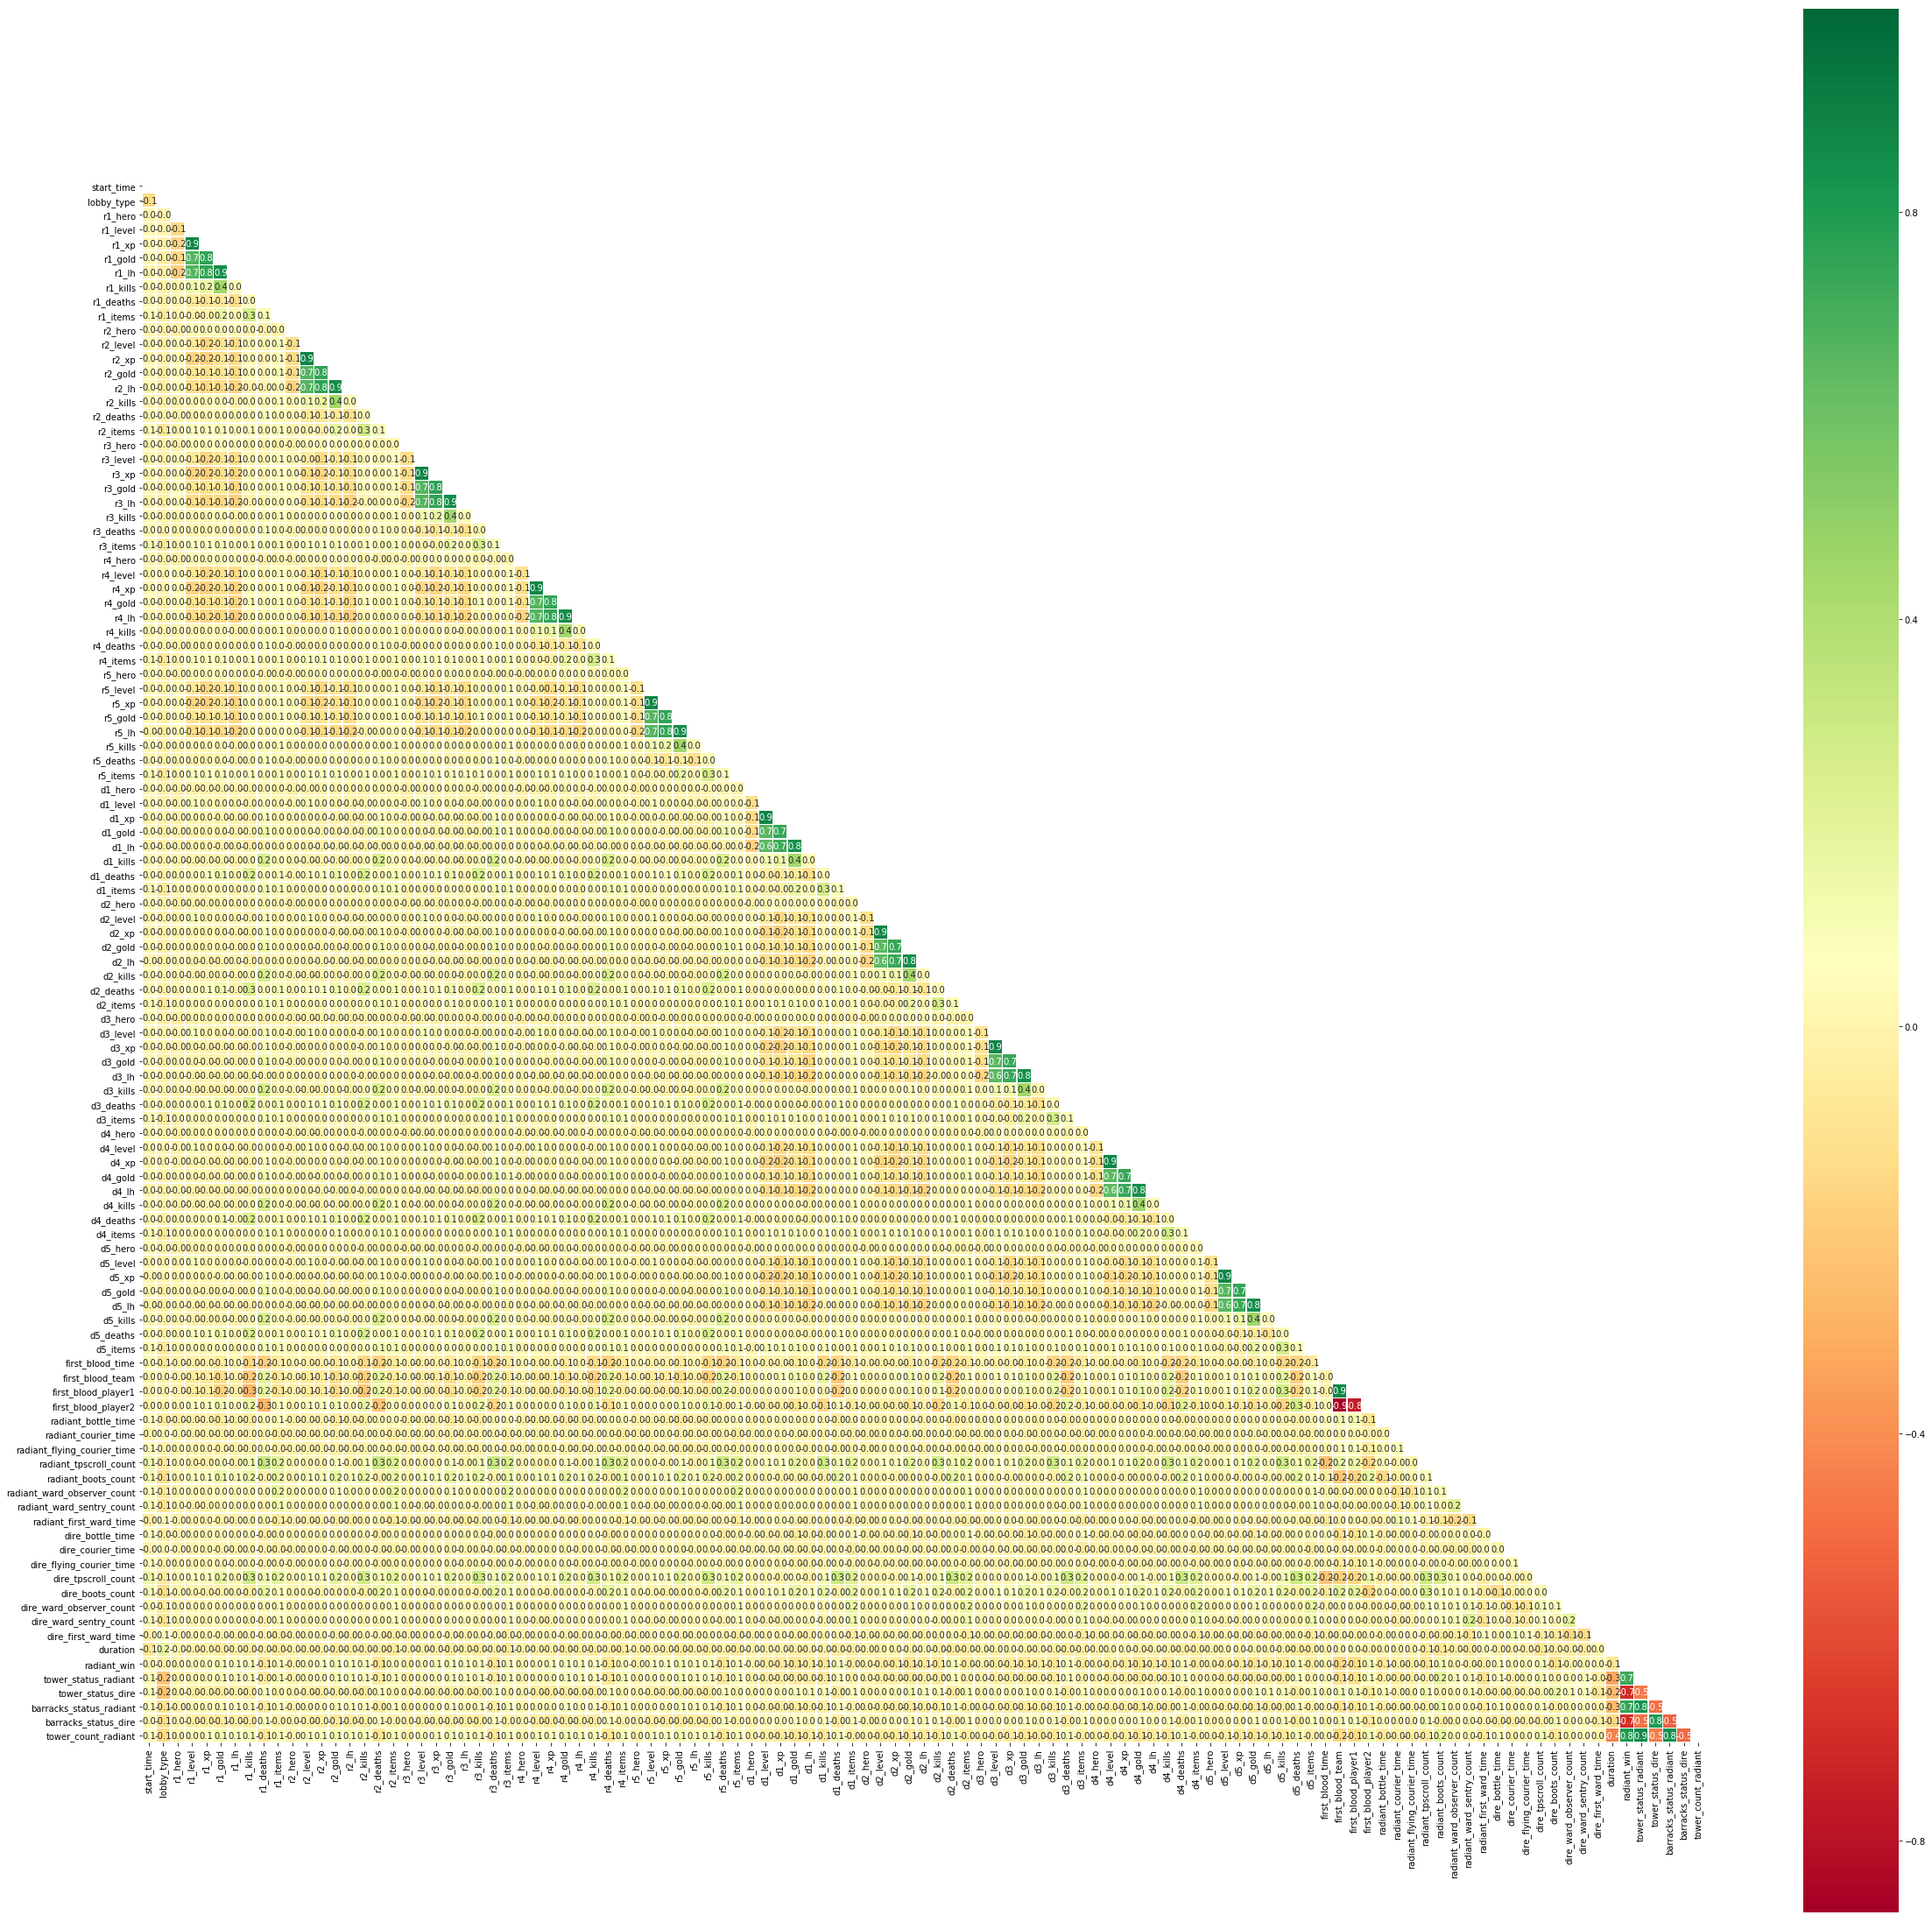

In [23]:
fig, ax = plt.subplots(figsize=(40,40))

corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(corr, cmap="RdYlGn", square=True, linewidths=.5, mask=mask,annot=True, fmt=".1f",ax=ax)

figure = svm.get_figure()    
figure.savefig('heatmap132.png', dpi=400) 